# Comparing Public Sector Hospital Nurse Salaries and employment Across Countries
MSc in Date Analytics


**Abstract**

 ***Comparison of Ireland's Public Sector Employment and Earnings with other countries worldwide***


This research explores the multifaceted world of hospital nursing, focusing on factors that shape nurses' salaries. Nurses play a crucial role in healthcare, providing compassionate care and support to patients in vulnerable moments. By examining variables such as geographic location, experience, education, and institutional policies, we seek to empower nurses in navigating their careers more effectively. In addition to monetary considerations, we delve into the intrinsic motivation driving individuals to choose nursing as a lifelong vocation, and the unwavering commitment and resilience that define nursing ethics.

 The study also investigates how nursing has evolved over time to adapt to technological advances and changing patient needs. Through in-depth analyses, we highlight the profound impact of nurses' work on patient outcomes and care. Ultimately, this research celebrates nurses' invaluable contributions and lays the groundwork for a promising and caring future for the nursing profession.

Keywords: **Nurse; Salary; Hospital; Ireland; Countries; Variable; Health**



### Stages of the project

this project is divided in four stages, each in one Notebook:

*Notebook 1. Data Preparation

*Notebook 2. Exploratory Data Analysis

*Notebook 3. Statistical Analysis and Hipothesis Testing

*Notebook 4. Machine Learning for Data Analysis




# 2. **Module 2. Exploratory data Analysis**

In previous stage we examined the dataset and figured out ways to get deeper to the most granular level of aggregation.

The dataset contains 6 different measures that can help compare salaries from three main groups of health care professions, and 2 types of employment. the salaries data is expressed in 6 measures that can be compared among countries, and over time. Also, the dataset has flags indicating where a particular datapoint was calculated using a different methodology, data is missing, there was a break in the reporting, it is a provisional value or an estimation.

In that process we found that the data has a lot of heterogenity. In statistics terms, the data has heterosscedasticity, it means that the variances are not homogeneus among different parts of the same data distribution. Other way to understand it is that the data comes from many different countries, populations and it can have different ways to be calculated, as a consequence, it is an aggregation of many different distributions. It can be visualized in the numerous boxplots, histograms and scatterplots that were plotted.

This is an important consideration, as heteroscedasticity prevent us for using very robust statistical techniques to test hypothesis.

As an alternative, we can use graphical methods to conduct our research.

# 2.1. Graphical Methods

Graphical analysis is of paramount importance in statistical analysis of a dataset as it offers a visual representation of the data's underlying patterns and trends. While numerical measures provide valuable insights, graphs provide a clearer and more intuitive understanding of the data's distribution, variability, and relationships between variables. They facilitate the identification of outliers, clusters, and patterns that might go unnoticed in a purely numerical analysis. Graphs also aid in making data-driven decisions, enabling researchers to communicate findings effectively to a wider audience. By employing graphical tools such as scatter plots, histograms, box plots, and time series plots, statisticians can gain deeper insights, detect potential errors or biases, and make informed choices about the appropriate statistical methods to employ. In summary, graphical analysis serves as a powerful and essential complement to numerical analysis, enhancing the overall robustness and validity of the statistical investigation.

To compare the variables year, salary, profession, and country in the dataframe, I can use various types of plots depending on the nature of the data and the insights I want to visualize. Here are some of the best plots to consider for each variable:

* Year (Categorical Variable):
  
  Bar Plot: Use a bar plot to show the distribution of data across different years.
  
  Line Plot: Display trends over time, especially if I have sequential data points.
  
  Histogram: If the data is continuous, I can create a histogram to show the frequency distribution of salaries over the years.

* Salary (Continuous Variable):

  Box Plot: Use a box plot to visualize the distribution of salaries, identify outliers, and compare salary ranges across different professions or countries.

  Violin Plot: Similar to the box plot but also shows the kernel density estimation of the data, giving a better view of the salary distribution.

  Scatter Plot: Compare salaries against other variables, like years, professions, or countries, to explore potential relationships or patterns.

* Profession (Categorical Variable):

  Bar Plot: Show the count of data points in each profession to compare the distribution.

  Pie Chart: If I want to see the proportion of each profession relative to the whole, a pie chart can be useful.

* Country (Categorical Variable):

  Bar Plot: Display the count of data points from each country to compare their representation.
  
  Stacked Bar Plot: If I have data on multiple years or salaries, I can use a stacked bar plot to show the distribution of professions across different countries.

Additionally, I can also consider using faceted or grouped plots to compare variables simultaneously. For example, I might create grouped bar plots to compare average salaries across different professions for each year, or a faceted scatter plot to compare salary distributions for various countries.

The choice of plots will depend on the specific research questions and the type of insights I want to extract from the data with the aim to create clear and informative visualizations that effectively communicate the relationships and patterns present in the data.

## 2.1.1. Load Datasets

### 2.1.1.1. IMPORTING LIBRARIES

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt           #visualisation
import seaborn as sns                     #visualisation
sns.set(color_codes=True)

In [ ]:
#prevent dataframe truncation by adjusting pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 2.1.1.2. LOADING THE DATA INTO THE DATA FRAME

In [ ]:
#read in csv
Augmented_df = pd.read_csv('/content/HEALTH_REAC_Augmented.csv')

# To display the top 5 rows
df.head(5)

VAR                         Variable      UNIT  \
0  RVNURINF  Remuneration of hospital nurses  YSALARMT   
1  RVNURINF  Remuneration of hospital nurses  YSALARMT   
2  RVNURINF  Remuneration of hospital nurses  YSALARMT   
3  RVNURINF  Remuneration of hospital nurses  YSALARMT   
4  RVNURINF  Remuneration of hospital nurses  YSALARMT   

                        Measure  COU    Country   YEA  Year    Value  \
0  Salaried, annual income, NCU  AUS  Australia  2010  2010  83705.0   
1  Salaried, annual income, NCU  AUS  Australia  2011  2011  89235.0   
2  Salaried, annual income, NCU  AUS  Australia  2012  2012  89971.0   
3  Salaried, annual income, NCU  AUS  Australia  2013  2013  91232.0   
4  Salaried, annual income, NCU  AUS  Australia  2014  2014  93042.0   

  Flag Codes                      Flags  
0          D  Difference in methodology  
1          D  Difference in methodology  
2          D  Difference in methodology  
3          D  Difference in methodology  
4          D  Difference in methodology

# ***TEMPORARY code to save and load data***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Nurse Salaries Project/HEALTH_REAC_Augmented.csv'
Augmented_df = pd.read_csv(file_path)

# Now I can work with the dataset stored in the 'df' DataFrame

In [ ]:
# Sort the countries alphabetically into a categorical variable
Augmented_df['Country'] = Augmented_df['Country'].astype('category')
Augmented_df['Country'] = Augmented_df['Country'].cat.reorder_categories(sorted(Augmented_df['Country'].unique()))

In [ ]:
# Descriptive statistics
summary_stats = Augmented_df.describe()
print(summary_stats)

              Year  Income per average wage  Income / per capita GDP  \
count  1170.000000              1170.000000              1170.000000   
mean   2016.000000                 2.332051                 2.533812   
std       3.743257                 1.159384                 1.370152   
min    2010.000000                 0.760000                 0.590000   
25%    2013.000000                 1.320000                 1.412500   
50%    2016.000000                 2.190000                 2.350000   
75%    2019.000000                 2.942500                 3.260000   
max    2022.000000                 7.620000                 8.520000   

       Income PPP for private consumption, in US$  Income, US$ exchange rate  \
count                                 1170.000000                1170.000000   
mean                                 91187.152026               91956.143128   
std                                  57811.546641               67751.085177   
min                            

## 2.1.2. Plot different features against one another (scatter), against frequency (histogram) and compare

### HISTOGRAM Identify frequency Distributions

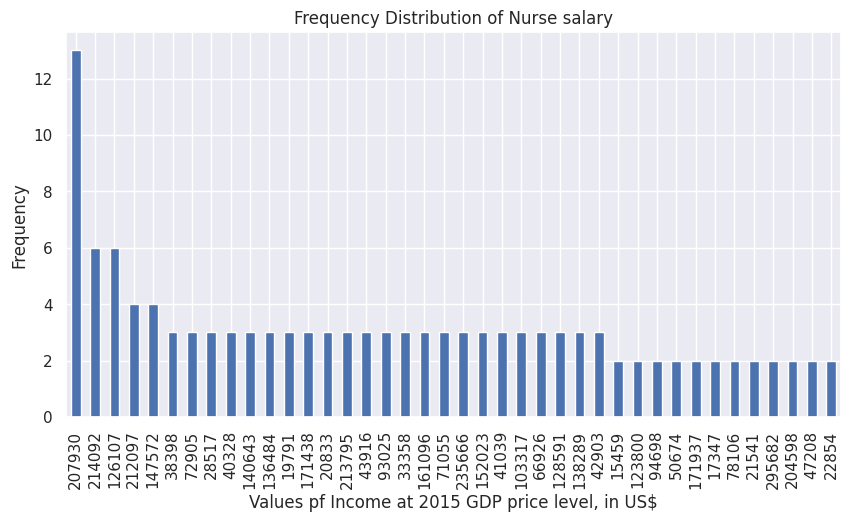

In [ ]:
# How much data is in which range of salaries?
Augmented_df['Income at 2015 GDP price level, in US$'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Frequency Distribution of Nurse salary")
plt.ylabel('Frequency')
plt.xlabel('Values pf Income at 2015 GDP price level, in US$');

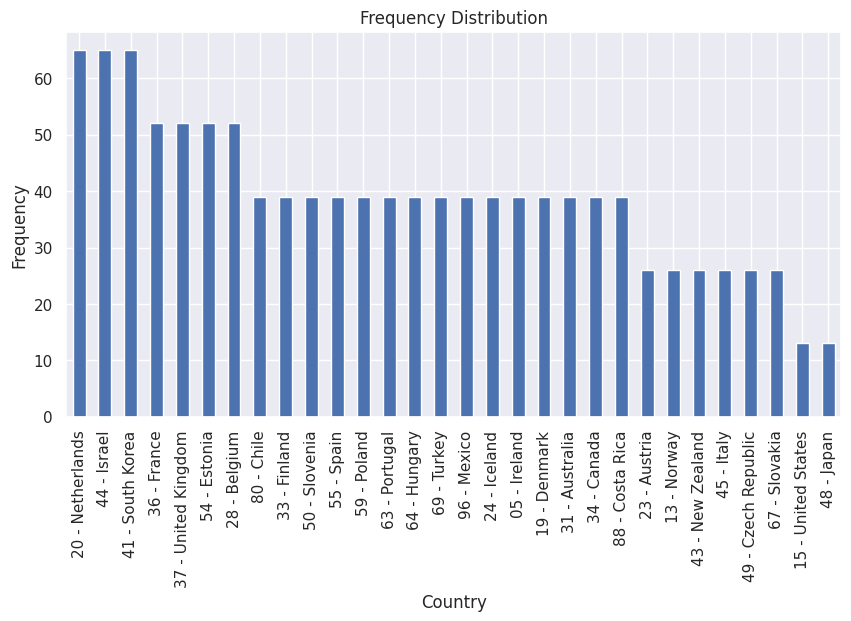

In [ ]:
# How many datapoints we have in each country?
Augmented_df['Country'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Frequency Distribution")
plt.ylabel('Frequency')
plt.xlabel('Country');

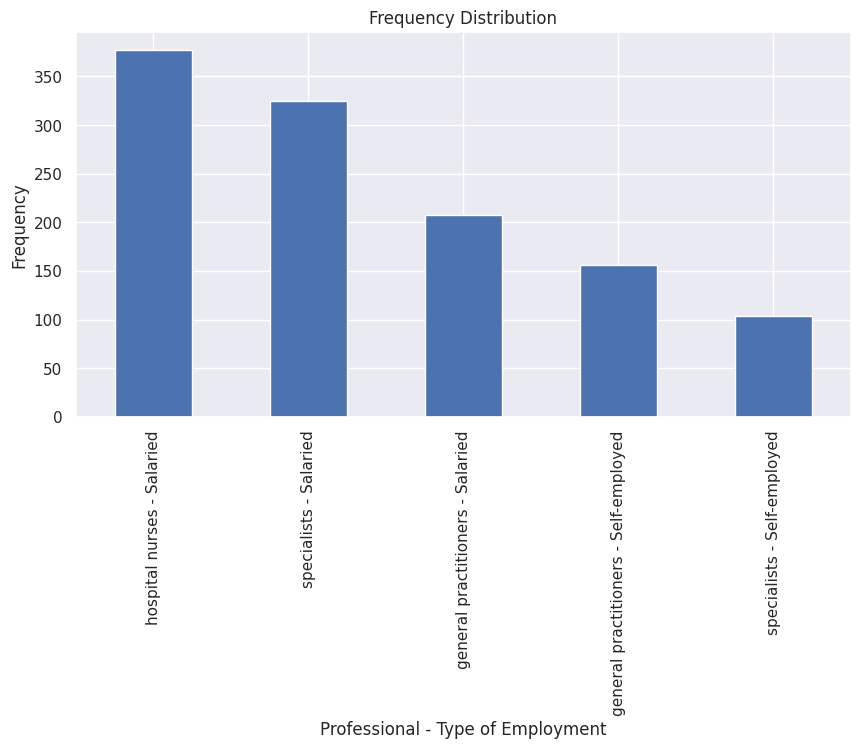

In [ ]:
# How many datapoints we have for each combination of type of proffessional and type of employment?
Augmented_df['Professional - Type of Employment'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Frequency Distribution")
plt.ylabel('Frequency')
plt.xlabel('Professional - Type of Employment');

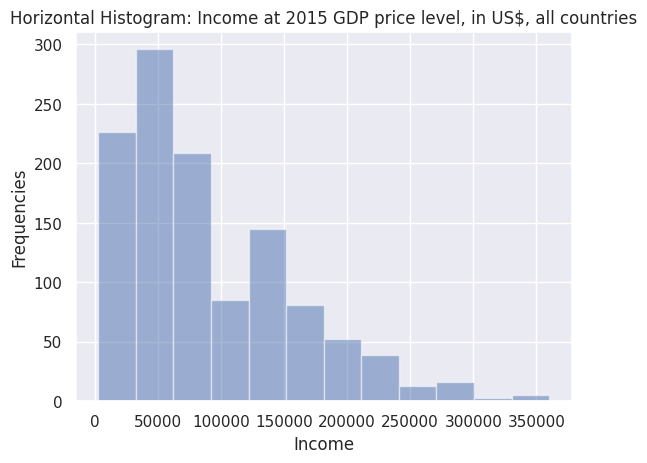

In [ ]:
Augmented_df['Income at 2015 GDP price level, in US$'].plot.hist(bins=12, alpha=0.5)
plt.xlabel("Income")
plt.ylabel("Frequencies")
plt.title("Horizontal Histogram: Income at 2015 GDP price level, in US$, all countries")
plt.show()

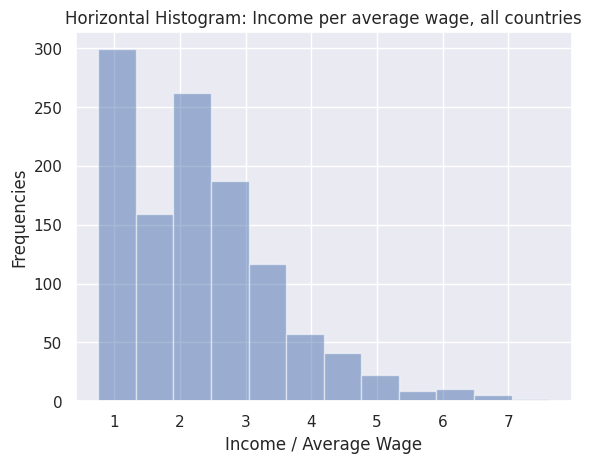

In [ ]:
Augmented_df['Income per average wage'].plot.hist(bins=12, alpha=0.5)
plt.xlabel("Income / Average Wage")
plt.ylabel("Frequencies")
plt.title("Horizontal Histogram: Income per average wage, all countries")
plt.show()

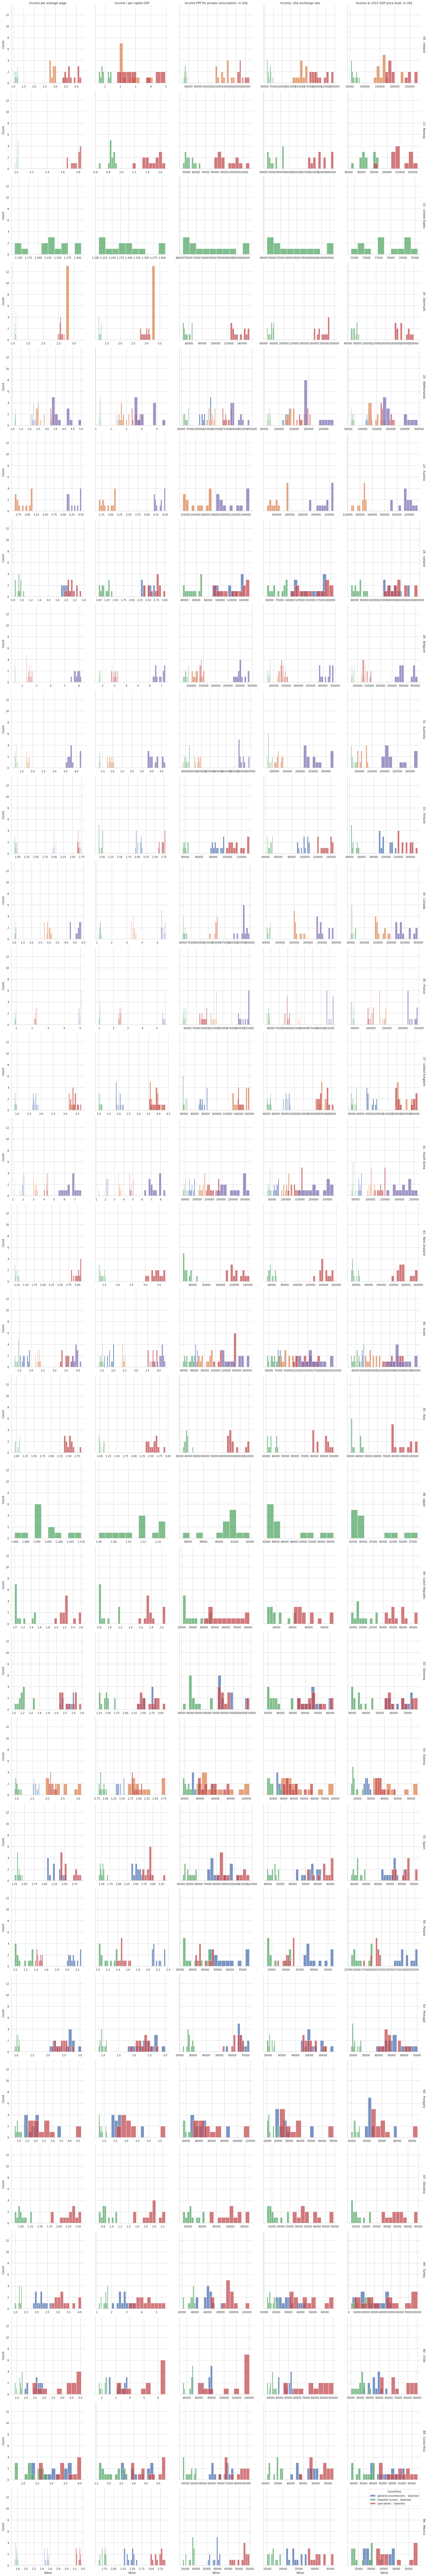

In [ ]:
# Create a FacetGrid plot with histograms
#In order to Plot i need a dataframe in melt form, unpivoted, again.
data_df = pd.melt(Augmented_df, id_vars=['Professional - Type of Employment',
       'Country', 'Year'], value_vars=['Income per average wage', 'Income / per capita GDP',
       'Income PPP for private consumption, in US$',
       'Income, US$ exchange rate', 'Income at 2015 GDP price level, in US$'], var_name='Measured_Unit', value_name='Value', col_level=None, ignore_index=True)
#print(data_df.info())
#data_df.head()

sns.set(style="whitegrid")
#plt.figure(figsize=(10, 10))
g = sns.FacetGrid(data_df, col="Measured_Unit", row='Country', hue="Professional - Type of Employment", margin_titles=True, height=5, sharex=False)
g.map_dataframe(sns.histplot, x="Value", bins=10, kde=False)
g.set_axis_labels("Value", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.legend(title="Countries", loc="best", bbox_to_anchor=(1, 1))

# Export the plot to a file (e.g., PNG format)
g.savefig("facetgrid_Histograms_plot.png", dpi=300)  # It will save to the current directory
plt.show()

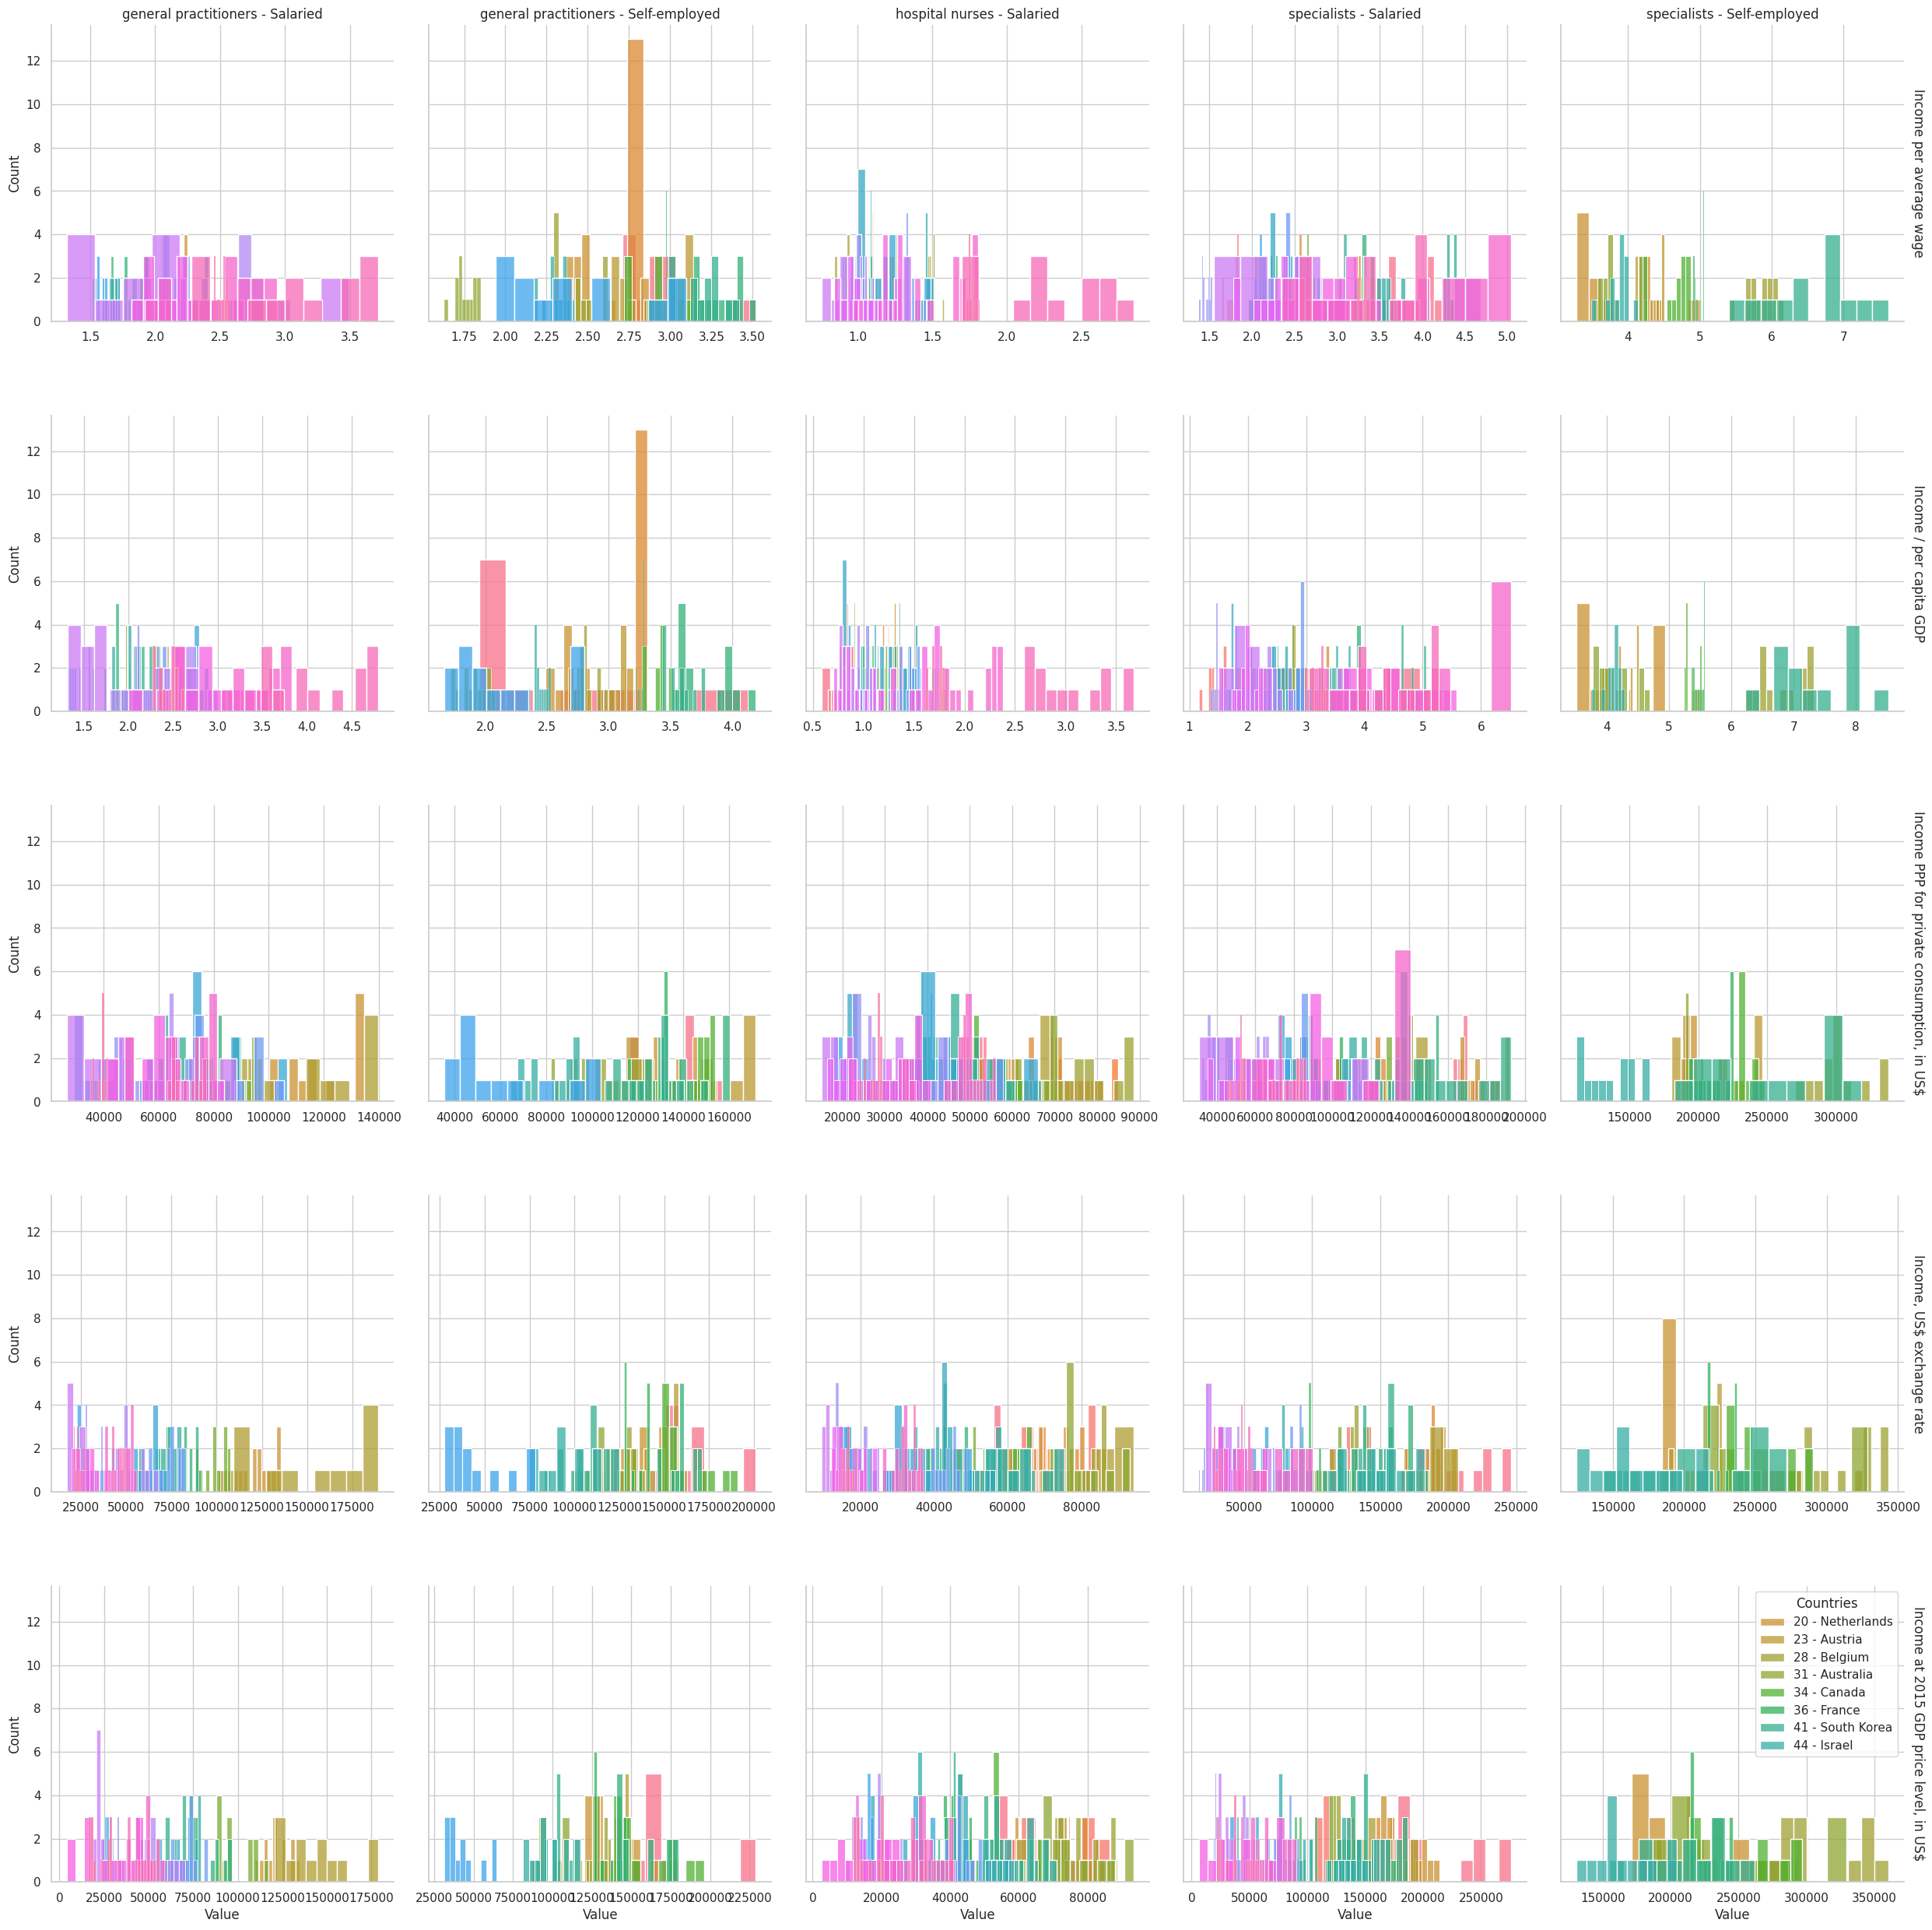

In [ ]:
#plt.figure(figsize=(10, 10))
g = sns.FacetGrid(data_df, col="Professional - Type of Employment", row='Measured_Unit', hue="Country", margin_titles=True, height=5, sharex=False)
g.map_dataframe(sns.histplot, x="Value", bins=10, kde=False)
g.set_axis_labels("Value", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.legend(title="Countries", loc="best", bbox_to_anchor=(1, 1))

# Export the plot to a file (e.g., PNG format)
g.savefig("facetgrid_Histograms_plot2.png", dpi=300)  # It will save to the current directory
plt.show()

### SCATTERPLOTS AND BOXPLOTS

In [ ]:
Augmented_df.columns

Index(['Variable', 'Employment', 'Professional - Type of Employment',
       'Country', 'Year', 'Income per average wage', 'Income / per capita GDP',
       'Income PPP for private consumption, in US$',
       'Income, US$ exchange rate', 'Income at 2015 GDP price level, in US$'],
      dtype='object')

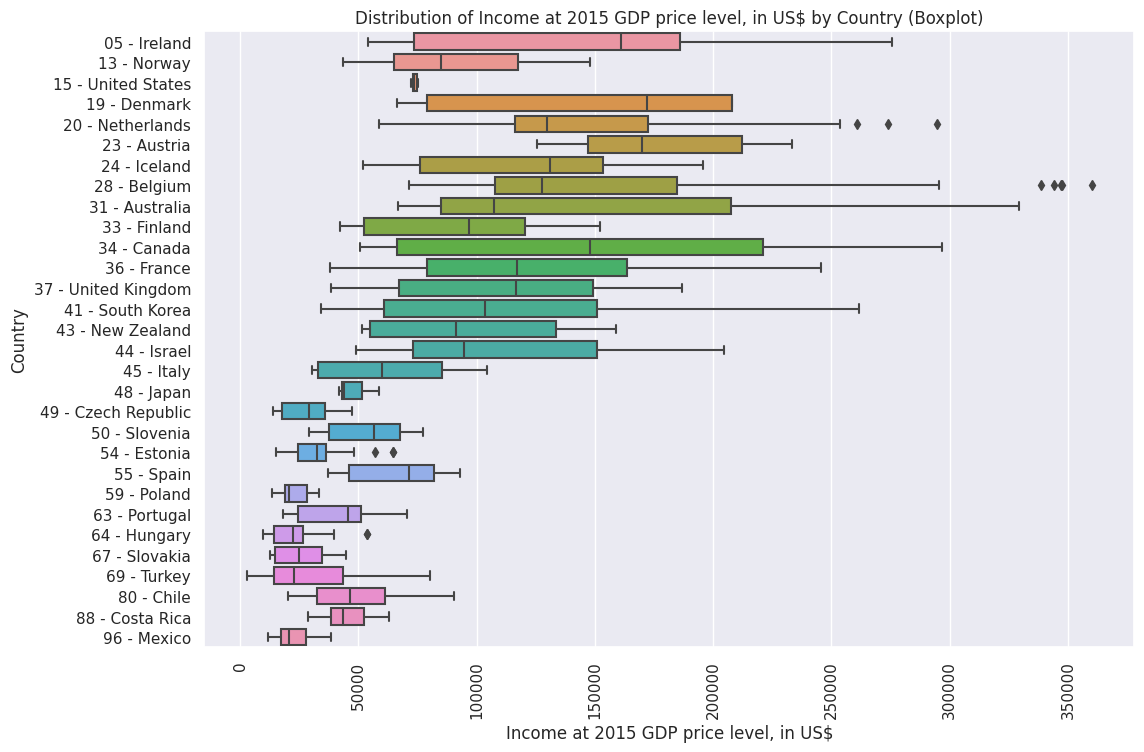

In [ ]:
# Use seaborn to create the boxplot
plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size
sns.boxplot(x='Income at 2015 GDP price level, in US$', y='Country', data=Augmented_df, orient='h')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Income at 2015 GDP price level, in US$')
plt.ylabel('Country')
plt.title('Distribution of Income at 2015 GDP price level, in US$ by Country (Boxplot)')
plt.show()

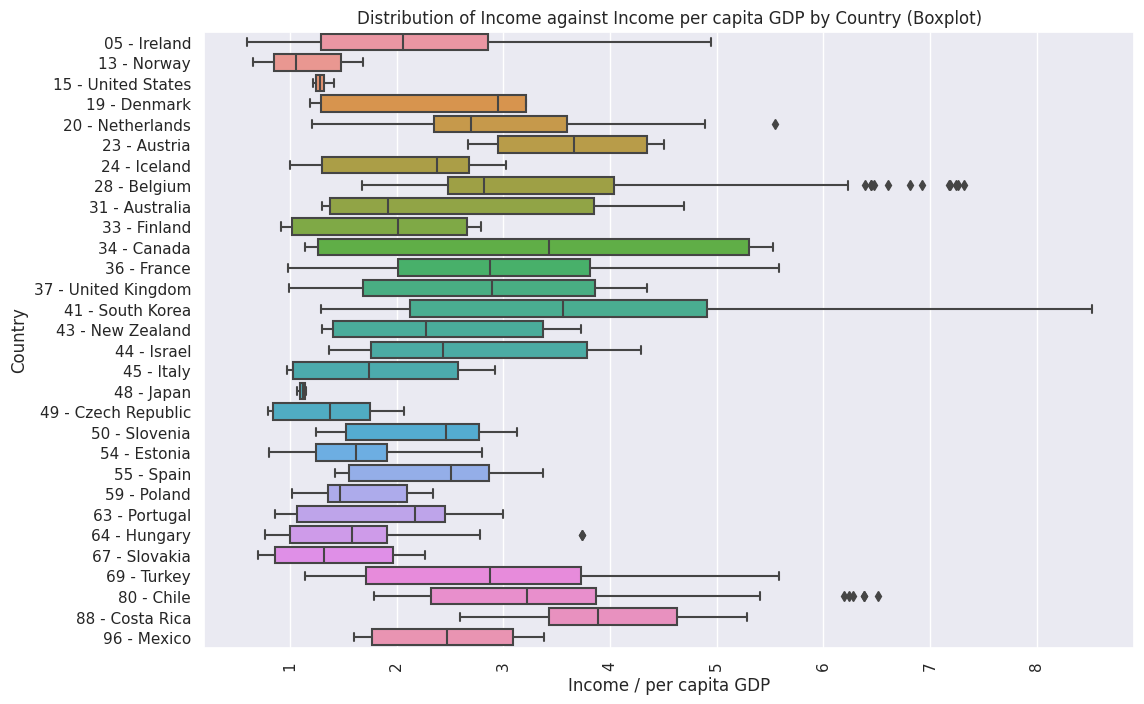

In [ ]:
# Use seaborn to create the boxplot
plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size
sns.boxplot(x='Income / per capita GDP', y='Country', data=Augmented_df, orient='h')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Income / per capita GDP')
plt.ylabel('Country')
plt.title('Distribution of Income against Income per capita GDP by Country (Boxplot)')
plt.show()

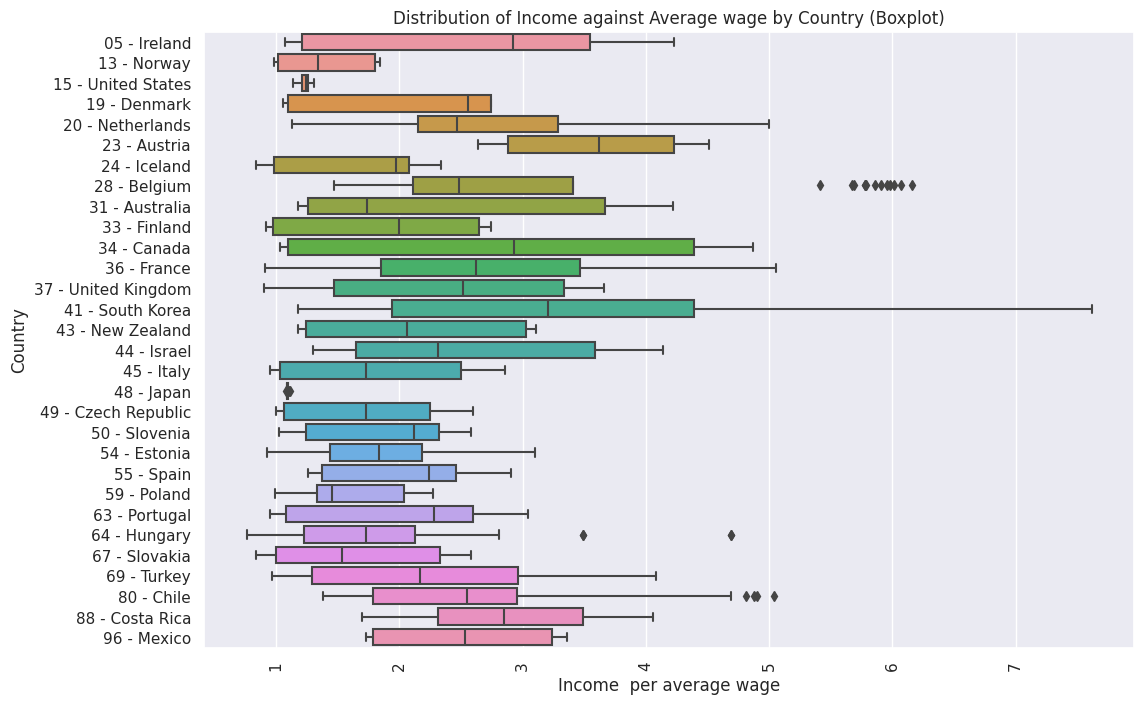

In [ ]:
# Use seaborn to create the boxplot
plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size
sns.boxplot(x='Income per average wage', y='Country', data=Augmented_df, orient='h')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Income  per average wage')
plt.ylabel('Country')
plt.title('Distribution of Income against Average wage by Country (Boxplot)')
plt.show()

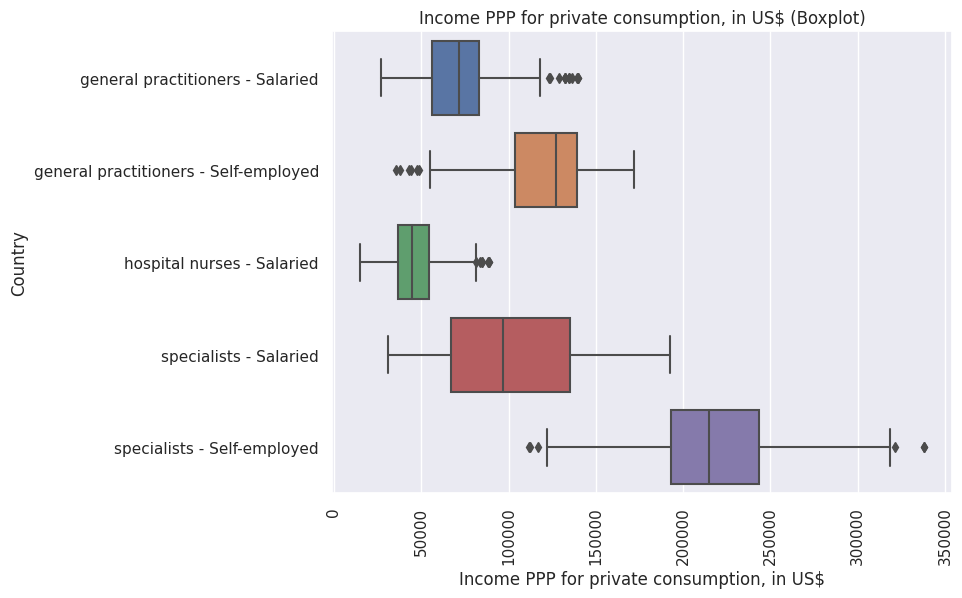

In [ ]:
# Use seaborn to create the boxplot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.boxplot(x='Income PPP for private consumption, in US$', y='Professional - Type of Employment', data=Augmented_df, orient='h')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Income PPP for private consumption, in US$')
plt.ylabel('Country')
plt.title('Income PPP for private consumption, in US$ (Boxplot)')
plt.show()

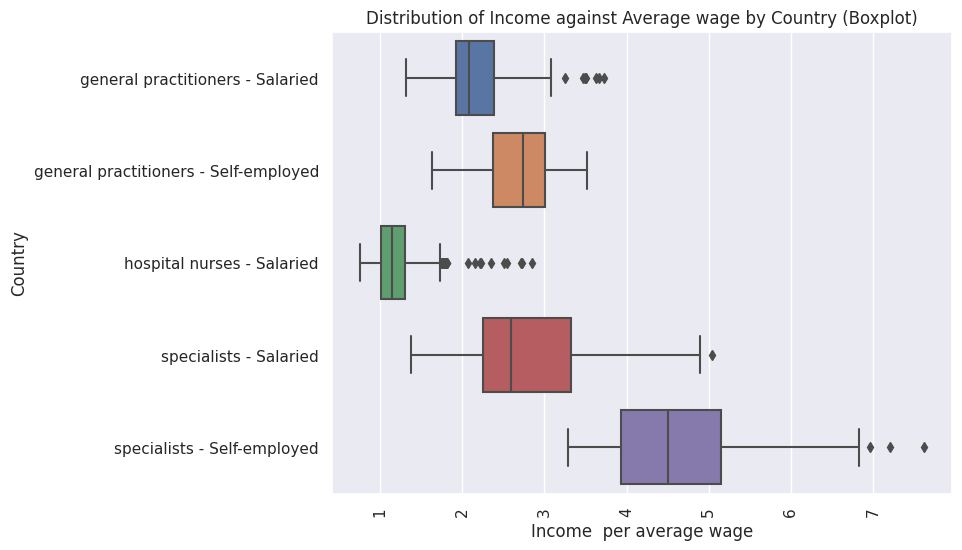

In [ ]:
# Use seaborn to create the boxplot
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.boxplot(x='Income per average wage', y='Professional - Type of Employment', data=Augmented_df, orient='h')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.xlabel('Income  per average wage')
plt.ylabel('Country')
plt.title('Income per average wage (Boxplot)')
plt.show()

In [ ]:
Augmented_df.columns

Index(['Variable', 'Employment', 'Professional - Type of Employment',
       'Country', 'Year', 'Income per average wage', 'Income / per capita GDP',
       'Income PPP for private consumption, in US$',
       'Income, US$ exchange rate', 'Income at 2015 GDP price level, in US$'],
      dtype='object')

 ### Plot different features against time

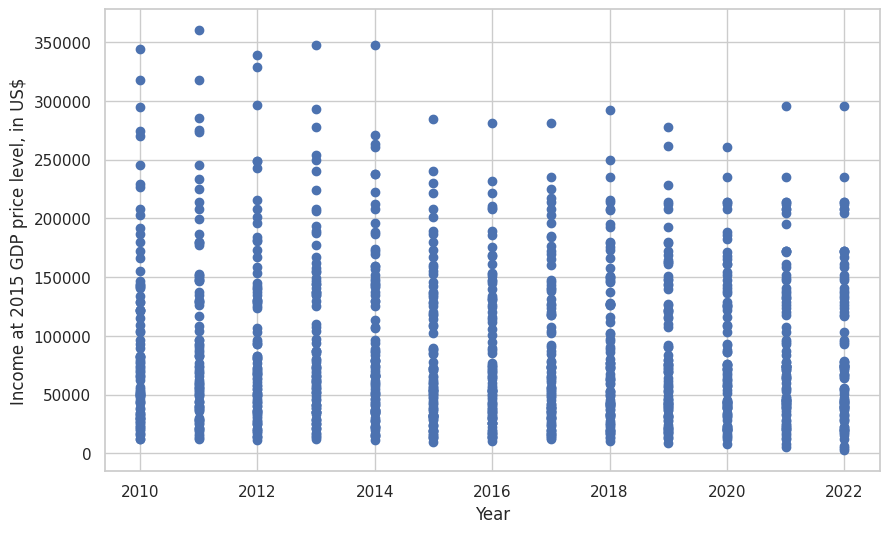

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(Augmented_df['Year'], Augmented_df['Income at 2015 GDP price level, in US$'])
ax.set_ylabel('Income at 2015 GDP price level, in US$')
ax.set_xlabel('Year')
plt.show()

#### Income at 2015 GDP price level, in US Dollars

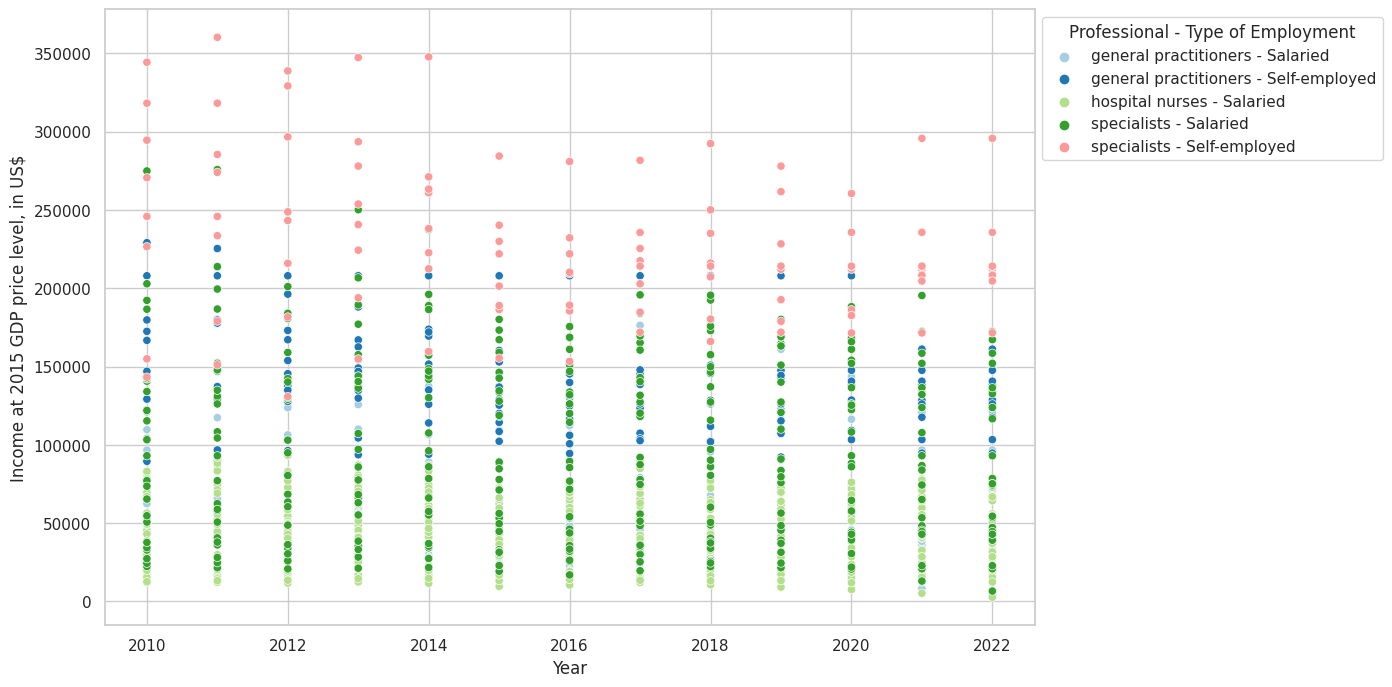

In [ ]:
#Income at 2015 GDP price level, in US$
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Year", y="Income at 2015 GDP price level, in US$", hue="Professional - Type of Employment", data=Augmented_df, palette="Paired")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

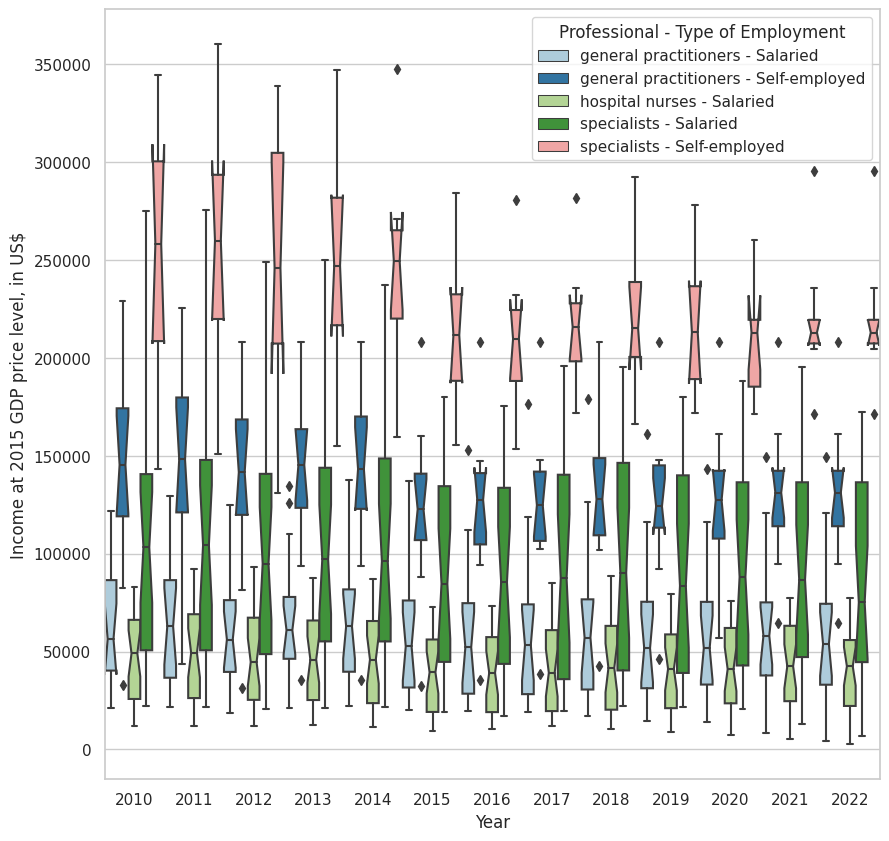

In [ ]:
#Income at 2015 GDP price level, in US$
plt.figure(figsize=(10, 10))
sns.boxplot(x="Year", y="Income at 2015 GDP price level, in US$", hue="Professional - Type of Employment", data=Augmented_df, width=1, palette="Paired", orient="v", notch=True)
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

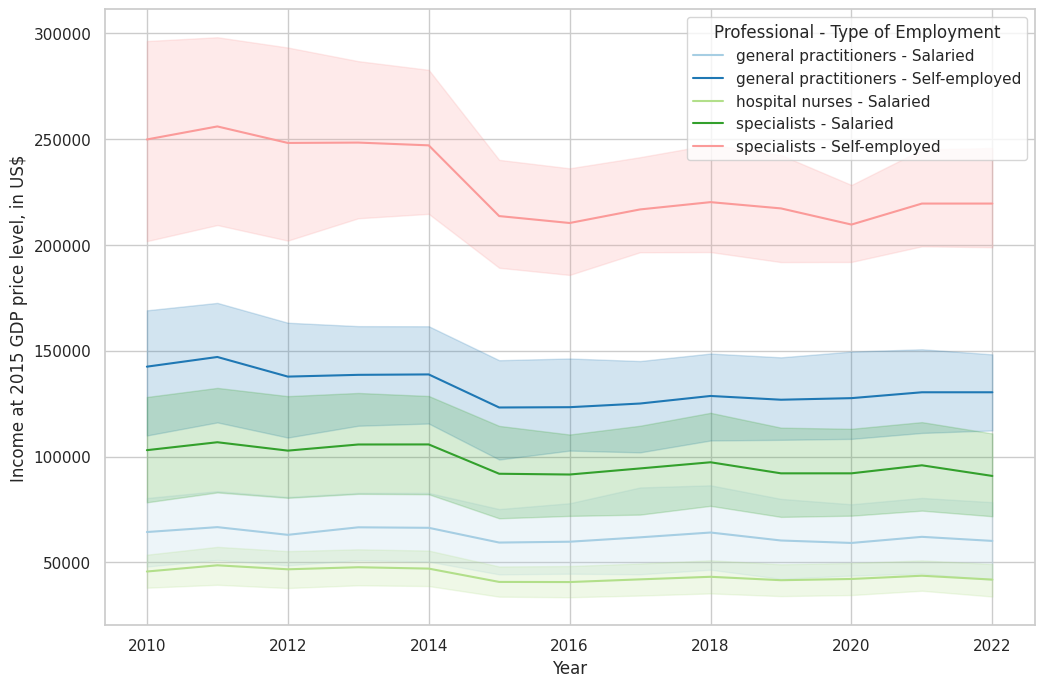

In [ ]:
# Lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Income at 2015 GDP price level, in US$", hue="Professional - Type of Employment", data=Augmented_df, palette="Paired")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

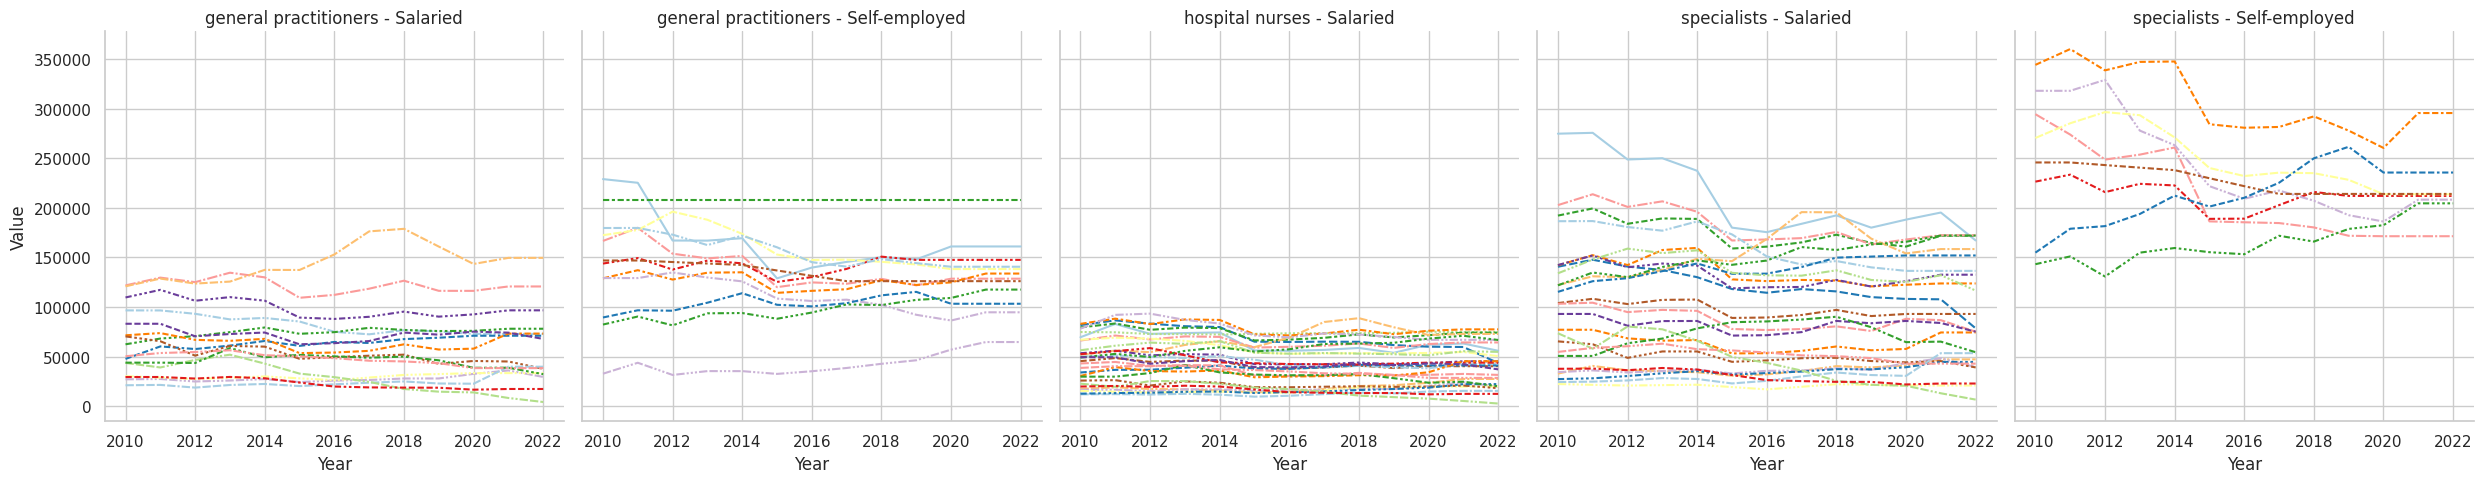

In [ ]:
#plt.figure(figsize=(10, 10))
g = sns.FacetGrid(Augmented_df, col="Professional - Type of Employment", hue="Country", margin_titles=True, height=5, sharex=False, palette="Paired")
g.map_dataframe(sns.lineplot, x="Year", y="Income at 2015 GDP price level, in US$", style="Country")
g.set_axis_labels("Year", "Value")
#plt.legend(title="Country", loc="best", bbox_to_anchor=(1, 1))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Export the plot to a file (e.g., PNG format)
#g.savefig("facetgrid_Histograms_plot2.png", dpi=300)  # It will save to the current directory
plt.show()

#### Income adjusted for Purchase Power and Price Parity for private consumption, in US$

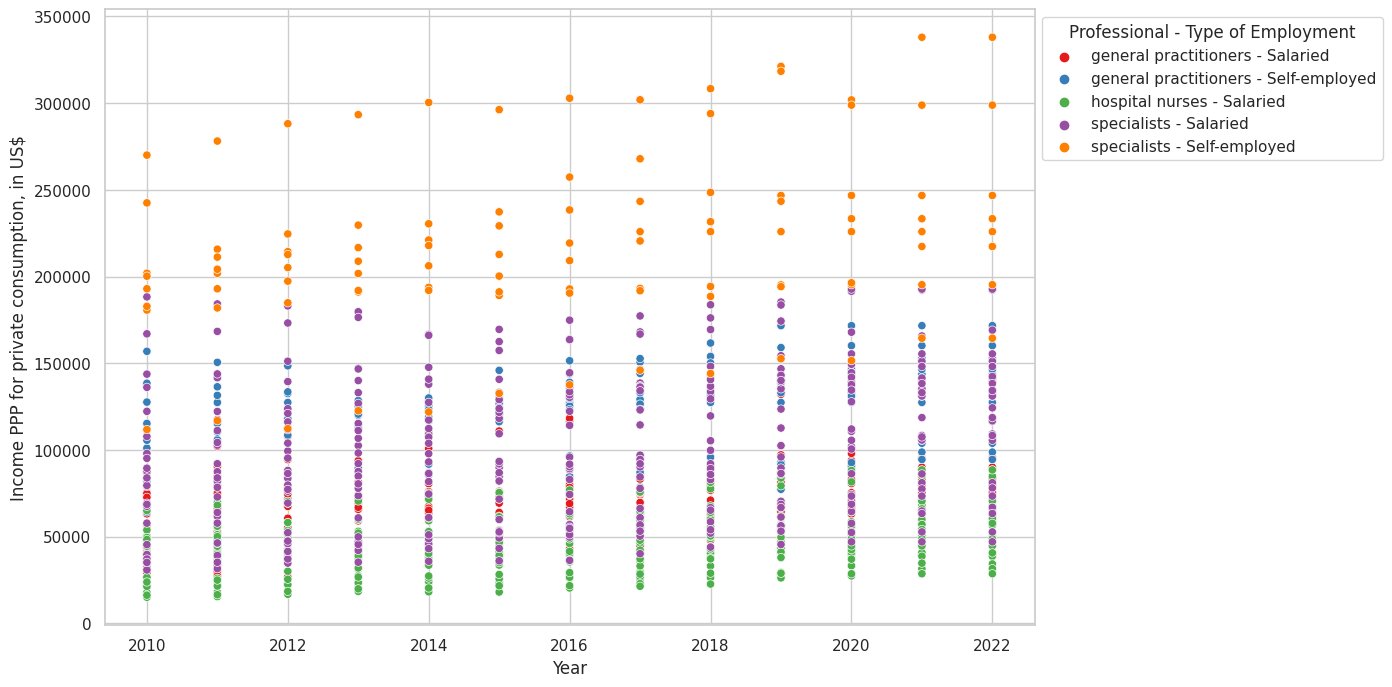

In [ ]:
#Income PPP for private consumption, in US$
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Year", y="Income PPP for private consumption, in US$", hue="Professional - Type of Employment", data=Augmented_df, palette="Set1")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

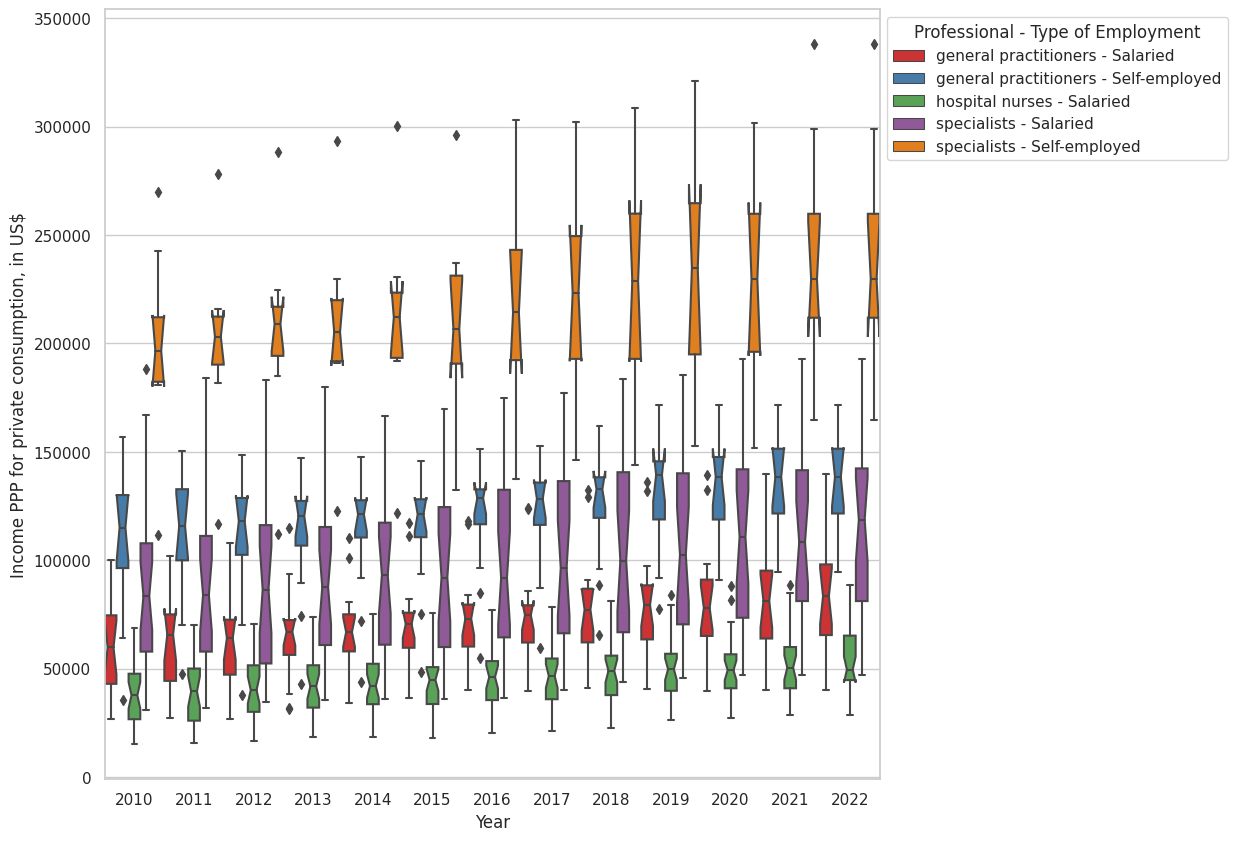

In [ ]:
# Income PPP for private consumption, in US$
plt.figure(figsize=(10, 10))
sns.boxplot(x="Year", y="Income PPP for private consumption, in US$", hue="Professional - Type of Employment", data=Augmented_df, width=1, palette="Set1", orient="v", notch=True)
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()


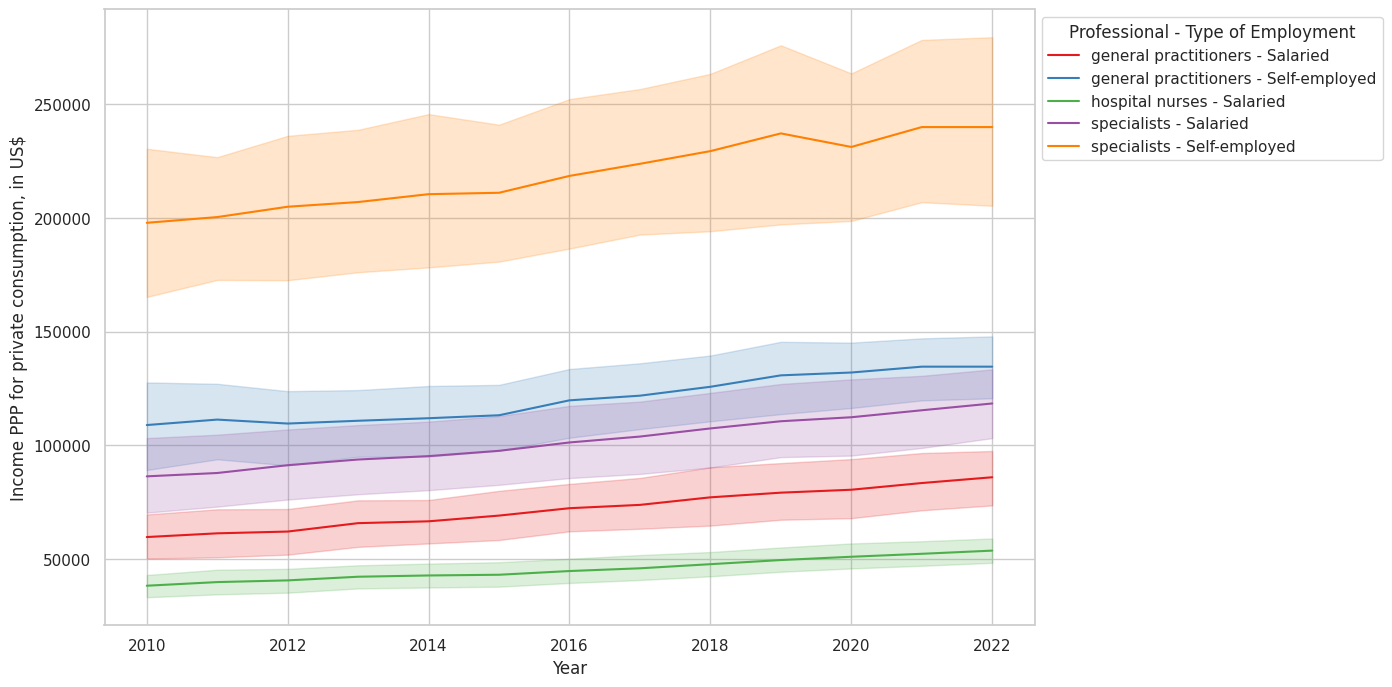

In [ ]:
# Lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Income PPP for private consumption, in US$", hue="Professional - Type of Employment", data=Augmented_df, palette="Set1")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

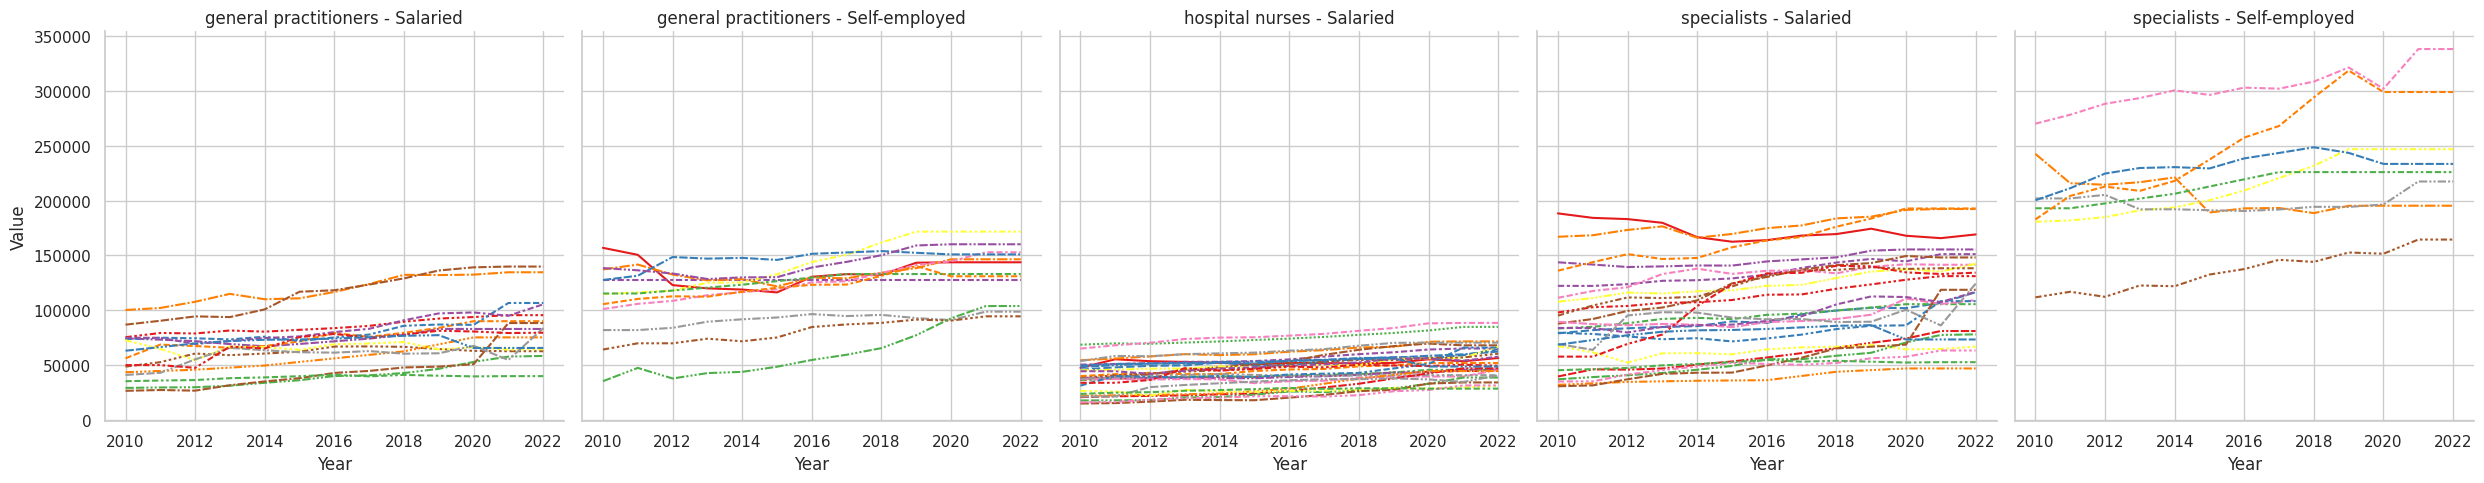

In [ ]:
#plt.figure(figsize=(10, 10))
g = sns.FacetGrid(Augmented_df, col="Professional - Type of Employment", hue="Country", margin_titles=True, height=5, sharex=False, palette="Set1")
g.map_dataframe(sns.lineplot, x="Year", y="Income PPP for private consumption, in US$", style="Country")
g.set_axis_labels("Year", "Value")
#plt.legend(title="Country", loc="best", bbox_to_anchor=(1, 1))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()

#### Income as a fraction of the Income per capita based on GDP

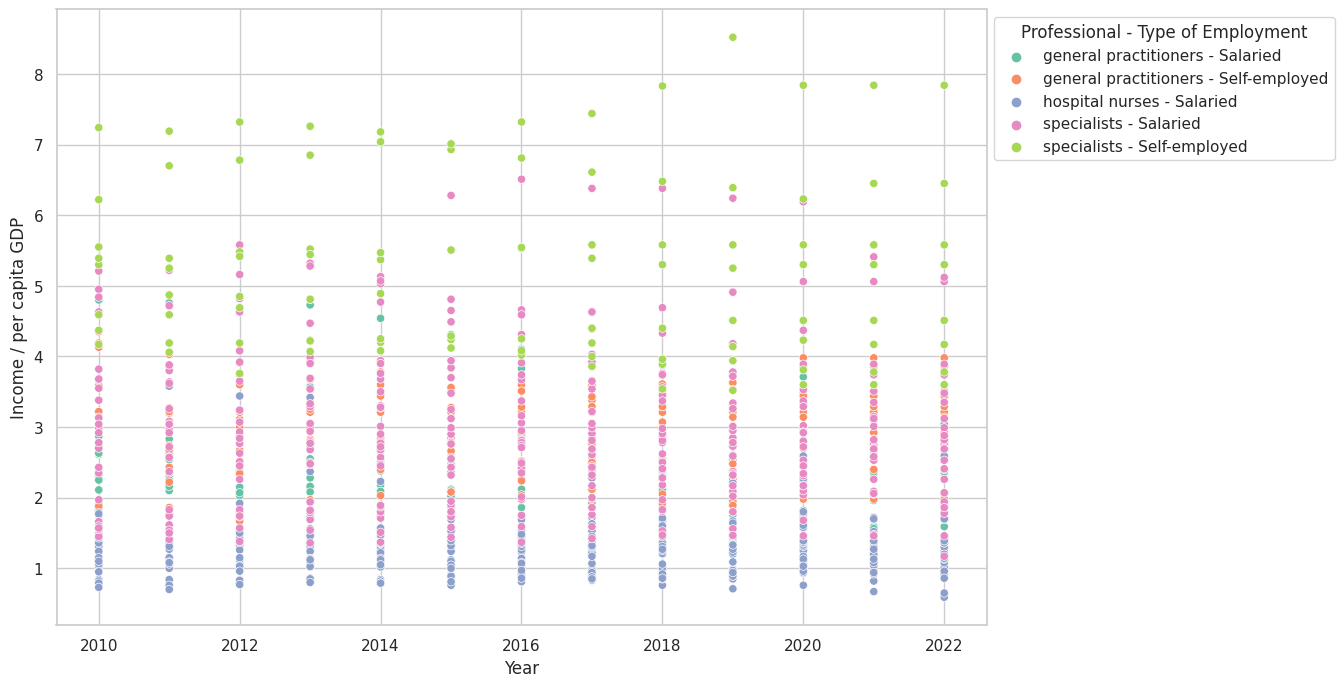

In [ ]:
#Income / per capita GDP
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Year", y="Income / per capita GDP", hue="Professional - Type of Employment", data=Augmented_df, palette="Set2")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

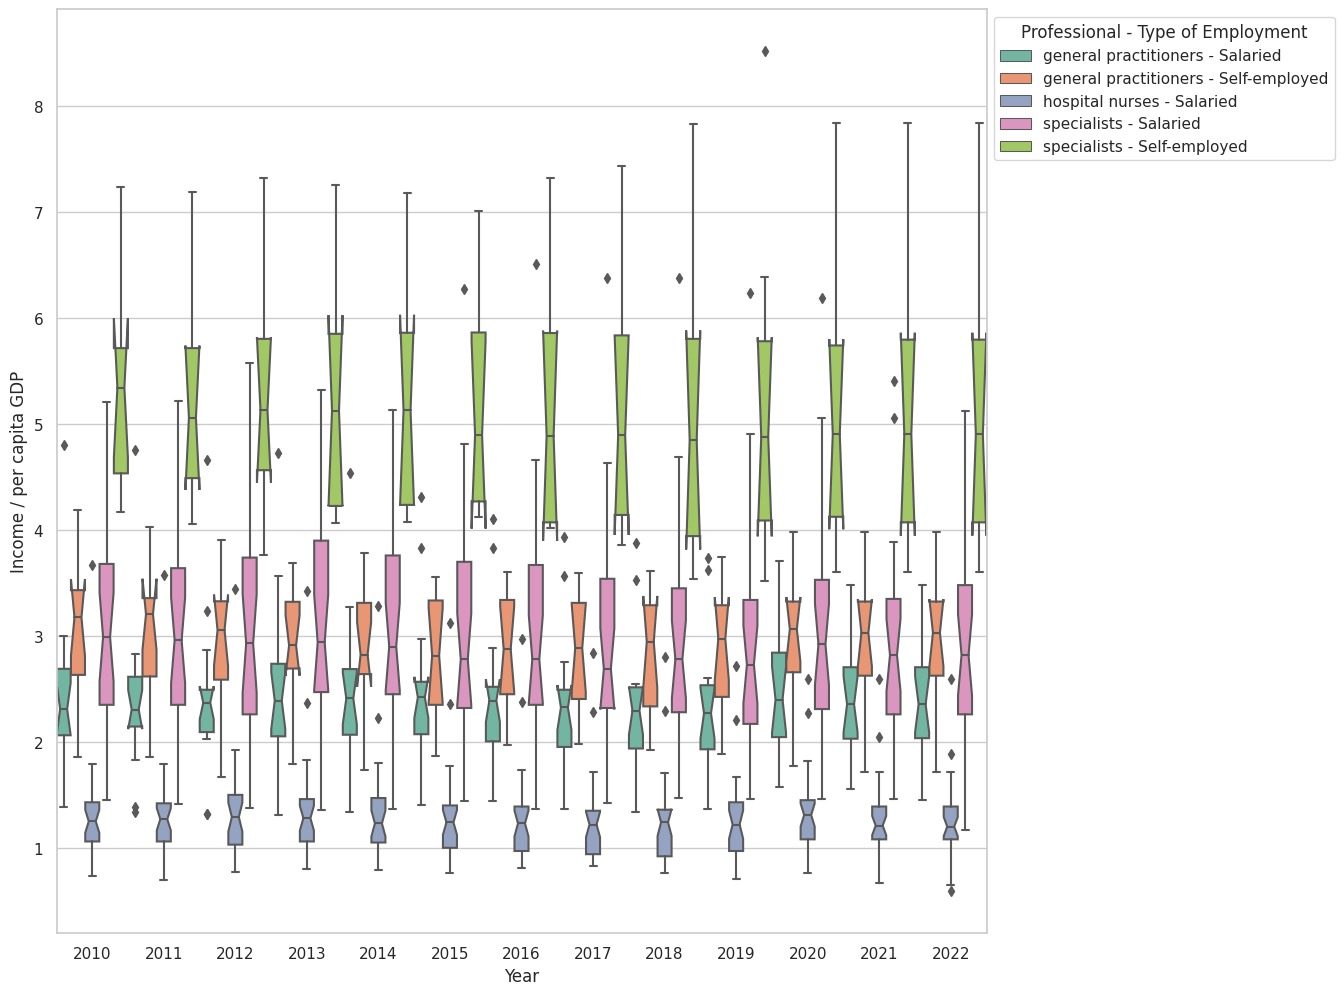

In [ ]:
#Income / per capita GDP
plt.figure(figsize=(12, 12))
sns.boxplot(x="Year", y="Income / per capita GDP", hue="Professional - Type of Employment", data=Augmented_df, width=1, palette="Set2", orient="v", notch=True)
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

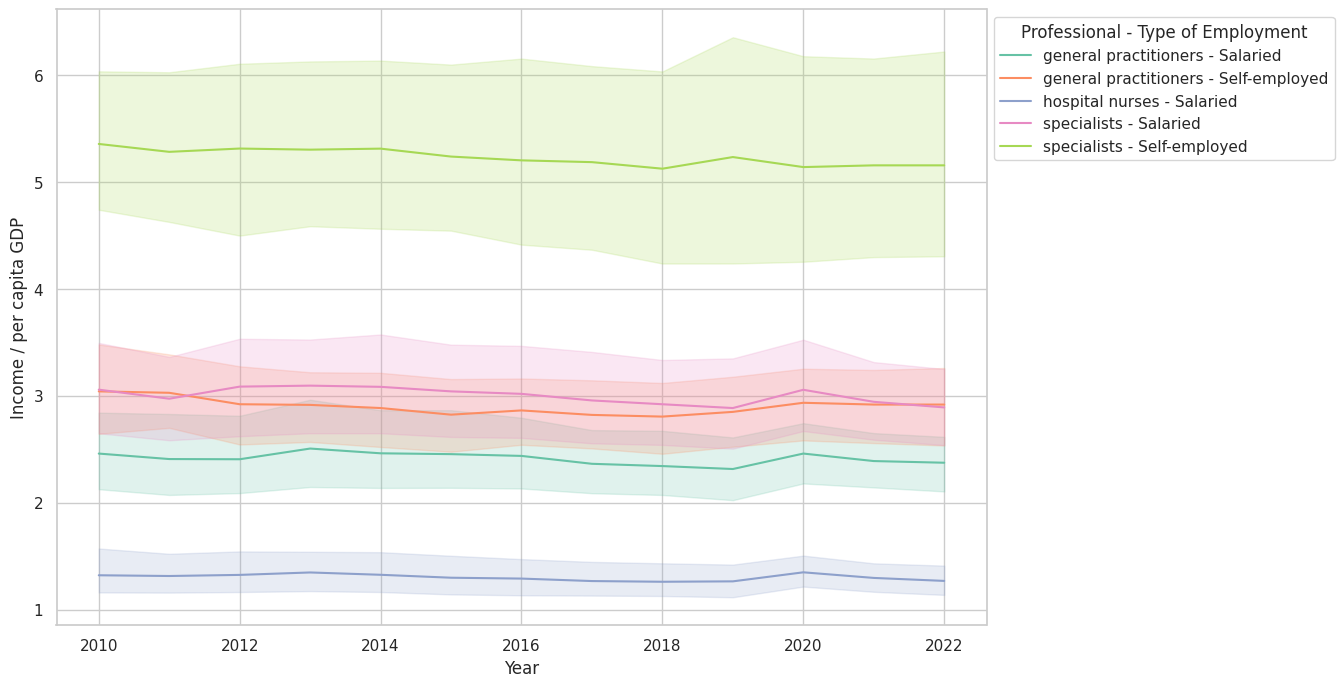

In [ ]:
# Lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Income / per capita GDP", hue="Professional - Type of Employment", data=Augmented_df, palette="Set2")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

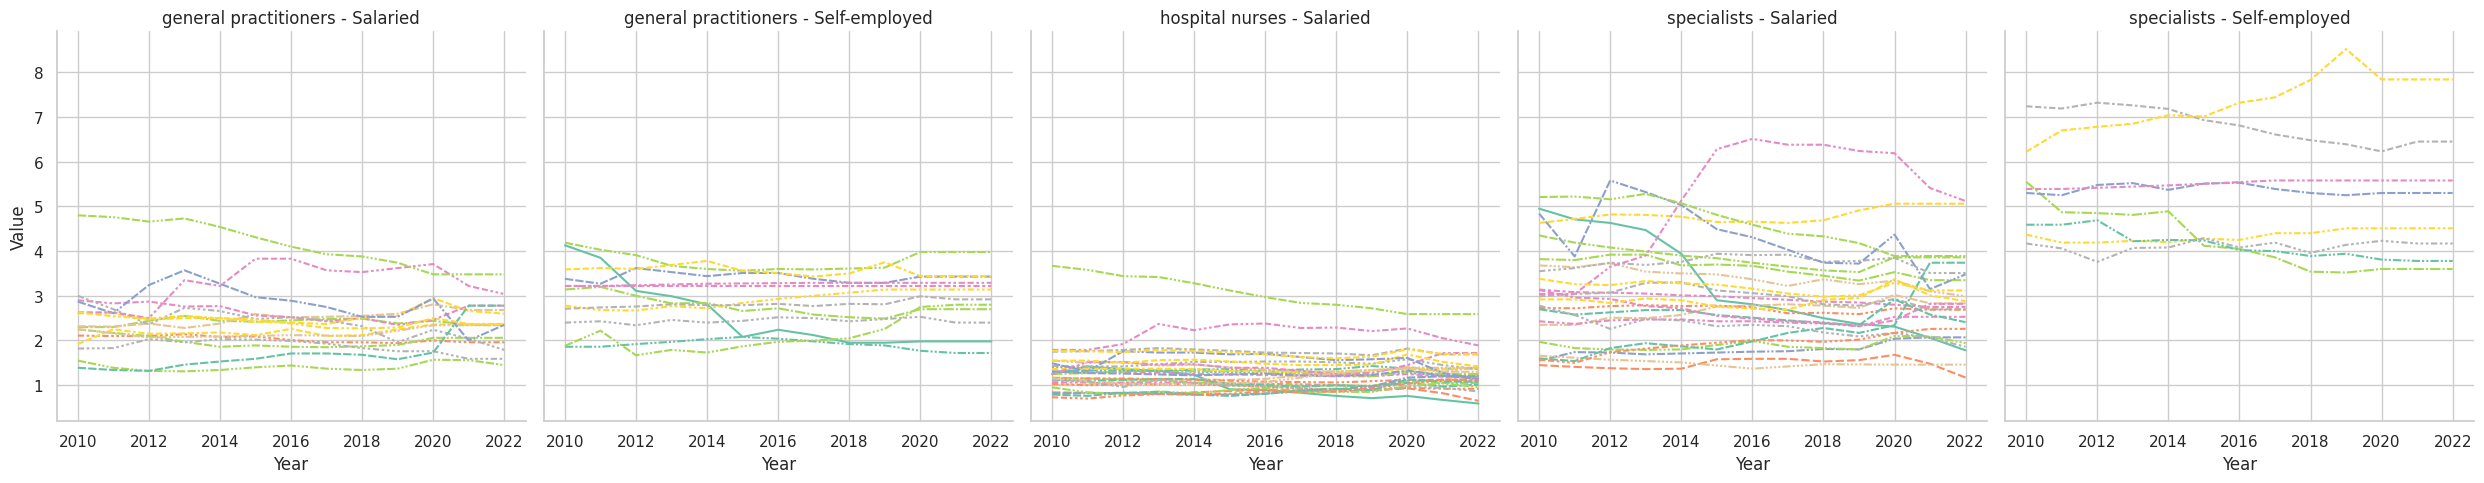

In [ ]:
#plt.figure(figsize=(10, 10))
g = sns.FacetGrid(Augmented_df, col="Professional - Type of Employment", hue="Country", margin_titles=True, height=5, sharex=False, palette="Set2")
g.map_dataframe(sns.lineplot, x="Year", y="Income / per capita GDP", style="Country")
g.set_axis_labels("Year", "Value")
#plt.legend(title="Country", loc="best", bbox_to_anchor=(1, 1))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()

#### Income compared with the average wage of the country

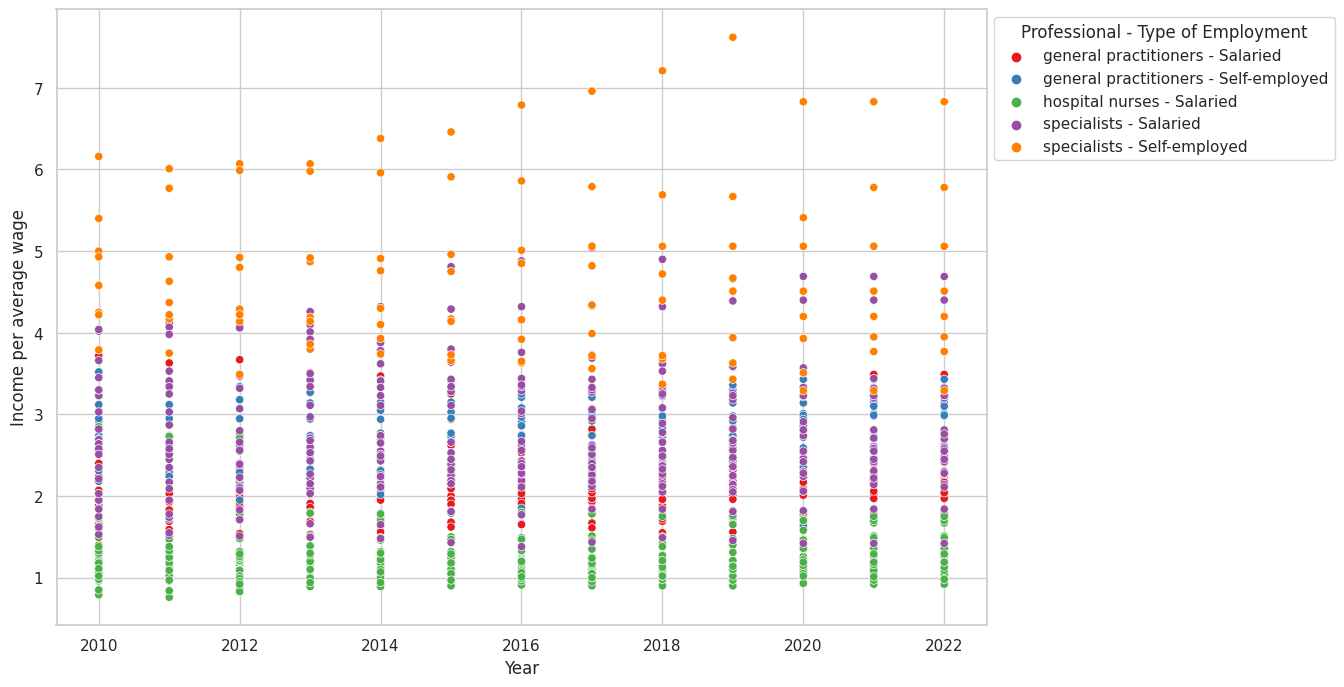

In [ ]:
#Income per average wage
plt.figure(figsize=(12, 8))
sns.scatterplot(x="Year", y="Income per average wage", hue="Professional - Type of Employment", data=Augmented_df, palette="Set3")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

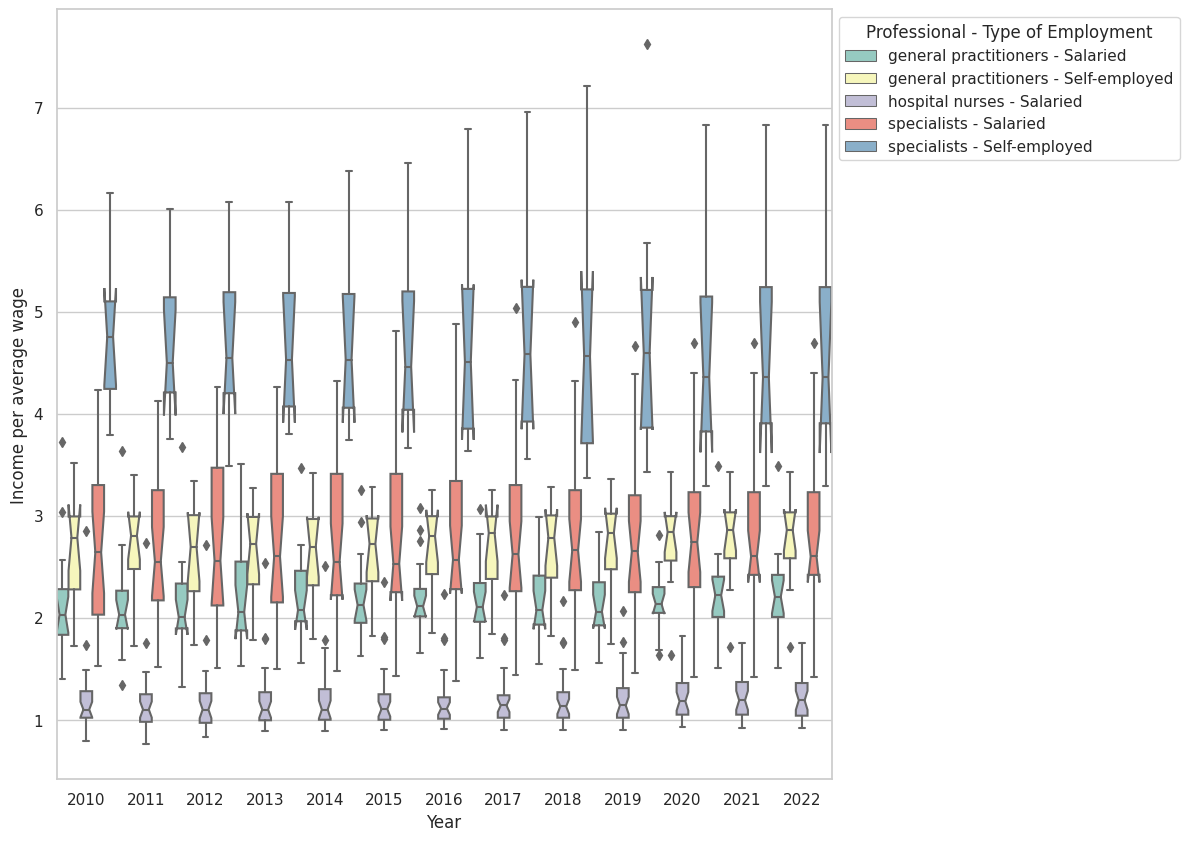

In [ ]:
# Income per average wage
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.boxplot(x="Year", y="Income per average wage", hue="Professional - Type of Employment", data=Augmented_df, width=1, palette="Set3", orient="v", notch=True)
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

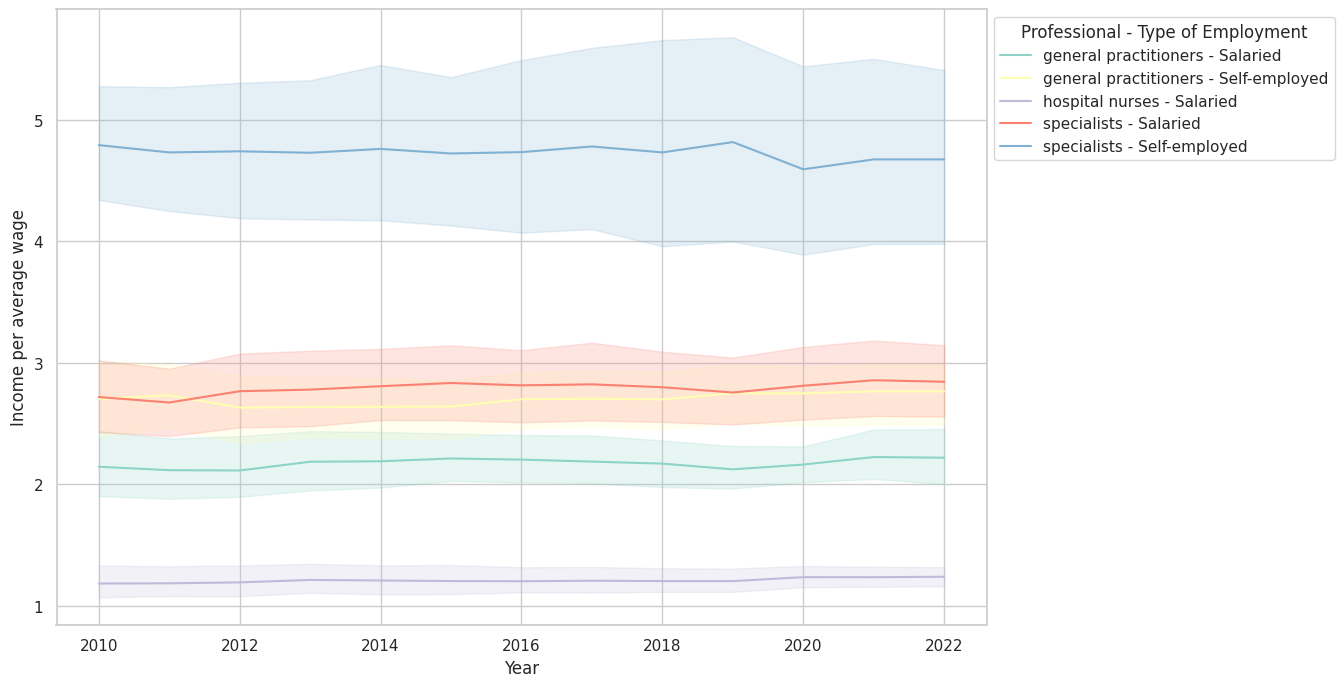

In [ ]:
# Lineplot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Income per average wage", hue="Professional - Type of Employment", data=Augmented_df, palette="Set3")
plt.legend(title="Professional - Type of Employment", loc="best", bbox_to_anchor=(1, 1))
plt.show()

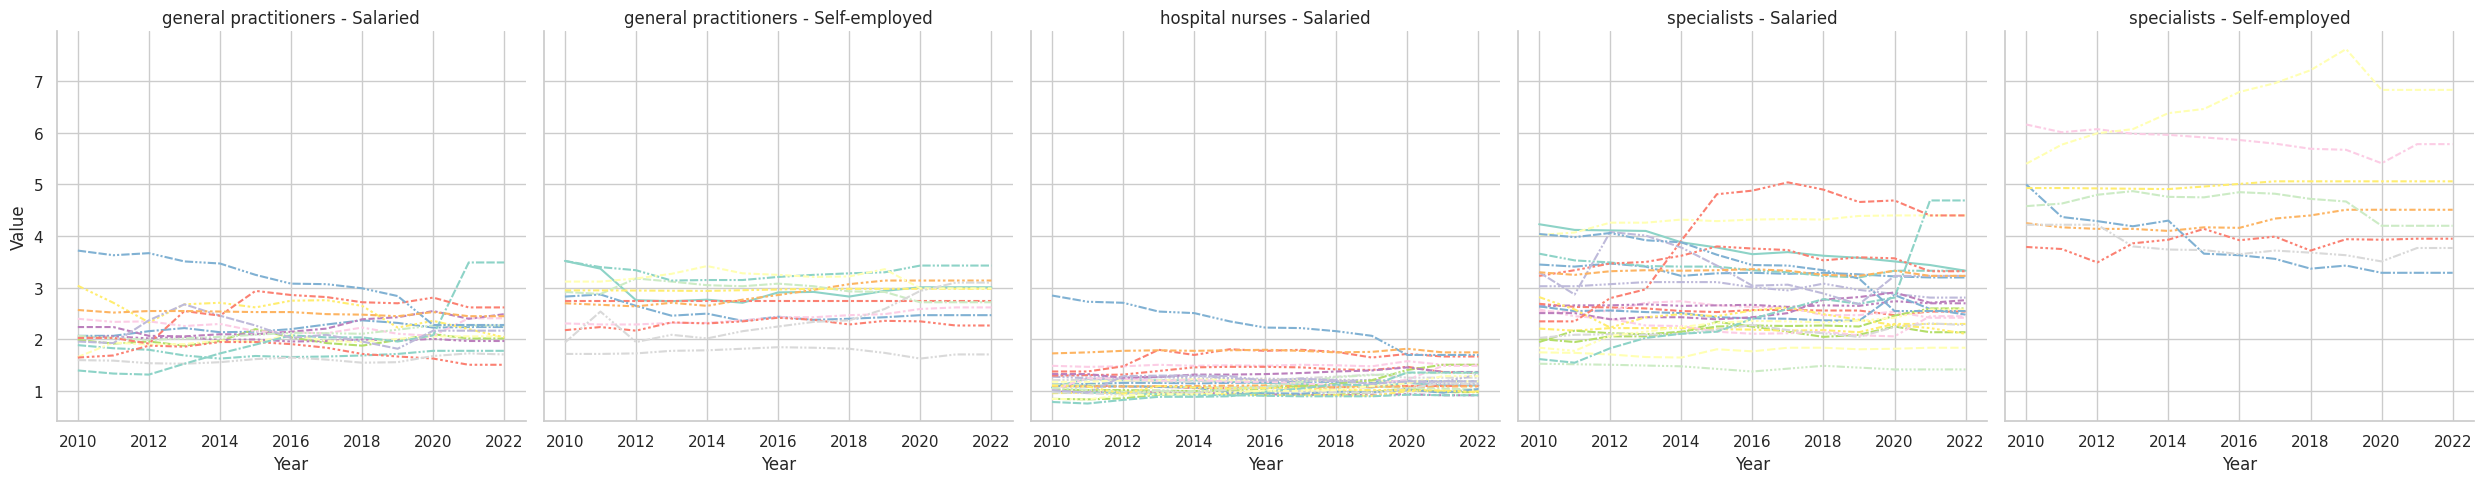

In [ ]:
#plt.figure(figsize=(10, 10))
g = sns.FacetGrid(Augmented_df, col="Professional - Type of Employment", hue="Country", margin_titles=True, height=5, sharex=False, palette="Set3")
g.map_dataframe(sns.lineplot, x="Year", y="Income per average wage", style="Country")
g.set_axis_labels("Year", "Value")
#plt.legend(title="Country", loc="best", bbox_to_anchor=(1, 1))
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()

# 2.2. Descriptive Statistics

In [ ]:
# Descriptive statistics
summary_stats = df.describe()
print(summary_stats)

               YEA         Year         Value
count  6951.000000  6951.000000  6.951000e+03
mean   2015.529996  2015.529996  2.858005e+06
std       3.497039     3.497039  1.845137e+07
min    2010.000000  2010.000000  5.900000e-01
25%    2013.000000  2013.000000  3.030000e+00
50%    2015.000000  2015.000000  4.864002e+04
75%    2018.000000  2018.000000  1.286970e+05
max    2022.000000  2022.000000  3.167222e+08


In [ ]:
Augmented_df.describe()

Measured_Unit         Year  Income per average wage  Income / per capita GDP  \
count          1170.000000              1170.000000              1170.000000   
mean           2016.000000                 2.332051                 2.533812   
std               3.743257                 1.159384                 1.370152   
min            2010.000000                 0.760000                 0.590000   
25%            2013.000000                 1.320000                 1.412500   
50%            2016.000000                 2.190000                 2.350000   
75%            2019.000000                 2.942500                 3.260000   
max            2022.000000                 7.620000                 8.520000   

Measured_Unit  Income PPP for private consumption, in US$  \
count                                         1170.000000   
mean                                         91187.152026   
std                                          57811.546641   
min                                          15112.620000   
25%                                          47853.263750   
50%                                          73830.860000   
75%                                         127379.177500   
max                                         337931.230000   

Measured_Unit  Income, US$ exchange rate  \
count                        1170.000000   
mean                        91956.143128   
std                         67751.085177   
min                          9605.160000   
25%                         38960.935000   
50%                         70962.470000   
75%                        134912.137500   
max                        343097.370000   

Measured_Unit  Income at 2015 GDP price level, in US$  
count                                     1170.000000  
mean                                     90440.011966  
std                                      67464.782615  
min                                       2677.000000  
25%                                      38550.000000  
50%                                      69676.500000  
75%                                     133773.000000  
max                                     360216.000000

In [ ]:
table_1 = Augmented_df[['Country', 'Income PPP for private consumption, in US$']].groupby(['Country']).describe()
table_1

Income PPP for private consumption, in US$                 \
                                                         count           mean   
Country                                                                         
05 - Ireland                                              39.0  120121.251282   
13 - Norway                                               26.0   73429.006923   
15 - United States                                        13.0   75530.769231   
19 - Denmark                                              39.0  106651.095641   
20 - Netherlands                                          65.0  140112.038154   
23 - Austria                                              26.0  179079.524231   
24 - Iceland                                              39.0   98347.978462   
28 - Belgium                                              52.0  159994.463269   
31 - Australia                                            39.0  118157.196410   
33 - Finland                                              39.0   80359.104615   
34 - Canada                                               39.0  144143.093077   
36 - France                                               52.0  119384.938269   
37 - United Kingdom                                       52.0  101668.178462   
41 - South Korea                                          65.0  132714.905692   
43 - New Zealand                                          26.0   87601.178462   
44 - Israel                                               65.0   90708.975538   
45 - Italy                                                26.0   65790.234615   
48 - Japan                                                13.0   40462.851538   
49 - Czech Republic                                       26.0   45113.254615   
50 - Slovenia                                             39.0   70157.609487   
54 - Estonia                                              52.0   46050.184423   
55 - Spain                                                39.0   76550.393077   
59 - Poland                                               39.0   43326.045385   
63 - Portugal                                             39.0   52298.226667   
64 - Hungary                                              39.0   42899.944103   
67 - Slovakia                                             26.0   36521.891538   
69 - Turkey                                               39.0   61789.866410   
80 - Chile                                                39.0   75355.021026   
88 - Costa Rica                                           39.0   67114.284615   
96 - Mexico                                               39.0   39298.631795   

                                                                       \
                              std        min          25%         50%   
Country                                                                 
05 - Ireland         51437.857378   47643.36   54522.3900  132951.860   
13 - Norway          22317.558411   45981.16   52680.6025   71774.840   
15 - United States    5734.428861   68700.00   70610.0000   74250.000   
19 - Denmark         36265.532041   50539.53   63047.2550  127407.100   
20 - Netherlands     50408.737112   54514.00  110089.5800  134652.250   
23 - Austria         43290.355915  114750.54  145628.8125  176168.360   
24 - Iceland         36362.777871   37236.72   67750.7400   99437.630   
28 - Belgium         87193.601817   65123.27   97982.8275  133445.375   
31 - Australia       59387.288257   53832.84   70458.7550   92910.040   
33 - Finland         31741.699810   36791.34   43686.3950   83761.210   
34 - Canada          73351.732604   49582.46   57720.4100  150921.230   
36 - France          63659.999902   36478.68   74065.8175  110467.765   
37 - United Kingdom  46333.671229   38114.96   61915.2075  105784.805   
41 - South Korea     76787.361513   40098.45   67491.0600  123237.920   
43 - New Zealand     38068.596281   45371.75   49318.4425   87329.910   
44 - Israel          36607.64261

In [ ]:
Table_2 = Augmented_df[['Country', 'Income per average wage']].groupby(['Country']).describe()
Table_2

Income per average wage                                    \
                                      count      mean       std   min     25%   
Country                                                                         
05 - Ireland                           39.0  2.628462  1.130493  1.07  1.2100   
13 - Norway                            26.0  1.393462  0.392469  0.98  1.0125   
15 - United States                     13.0  1.228462  0.054749  1.14  1.2100   
19 - Denmark                           39.0  2.132308  0.753876  1.06  1.1000   
20 - Netherlands                       65.0  2.604000  0.958151  1.13  2.1500   
23 - Austria                           26.0  3.596154  0.742515  2.64  2.8850   
24 - Iceland                           39.0  1.683590  0.546494  0.84  0.9800   
28 - Belgium                           52.0  3.085577  1.669017  1.47  2.1125   
31 - Australia                         39.0  2.270769  1.139615  1.18  1.2600   
33 - Finland                           39.0  1.873077  0.717786  0.92  0.9750   
34 - Canada                            39.0  2.882821  1.472740  1.03  1.1000   
36 - France                            52.0  2.782692  1.480477  0.91  1.8550   
37 - United Kingdom                    52.0  2.340192  1.060992  0.90  1.4675   
41 - South Korea                       65.0  3.438308  1.913895  1.18  1.9400   
43 - New Zealand                       26.0  2.117308  0.900713  1.18  1.2425   
44 - Israel                            65.0  2.569692  0.987593  1.30  1.6500   
45 - Italy                             26.0  1.769615  0.766569  0.95  1.0325   
48 - Japan                             13.0  1.093077  0.008046  1.08  1.0900   
49 - Czech Republic                    26.0  1.710769  0.595986  1.00  1.0625   
50 - Slovenia                          39.0  1.915897  0.516770  1.02  1.2450   
54 - Estonia                           52.0  1.800385  0.582271  0.93  1.4375   
55 - Spain                             39.0  2.064103  0.549970  1.26  1.3750   
59 - Poland                            39.0  1.579231  0.423377  0.99  1.3300   
63 - Portugal                          39.0  2.007179  0.720194  0.95  1.0800   
64 - Hungary                           39.0  1.891282  0.965675  0.76  1.2250   
67 - Slovakia                          26.0  1.642308  0.660256  0.84  1.0025   
69 - Turkey                            39.0  2.216410  0.914470  0.97  1.2900   
80 - Chile                             39.0  2.739487  1.156699  1.38  1.7900   
88 - Costa Rica                        39.0  2.925641  0.697925  1.70  2.3150   
96 - Mexico                            39.0  2.525897  0.631547  1.73  1.7900   

                                          
                       50%     75%   max  
Country                                   
05 - Ireland         2.920  3.5500  4.23  
13 - Norway          1.340  1.8000  1.84  
15 - United States   1.240  1.2600  1.31  
19 - Denmark         2.560  2.7400  2.74  
20 - Netherlands     2.470  3.2900  5.00  
23 - Austria         3.620  4.2300  4.51  
24 - Iceland         1.970  2.0750  2.34  
28 - Belgium         2.480  3.4075  6.16  
31 - Australia       1.740  3.6650  4.22  
33 - Finland         2.000  2.6500  2.74  
34 - Canada          2.930  4.3900  4.87  
36 - France          2.620  3.4625  5.06  
37 - United Kingdom  2.515  3.3325  3.66  
41 - South Korea     3.210  4.3900  7.62  
43 - New Zealand     2.065  3.0250  3.11  
44 - Israel          2.310  3.5900  4.14  
45 - Italy           1.730  2.5025  2.86  
48 - Japan           1.090  1.0950  1.11  
49 - Czech Republic  1.730  2.2500  2.60  
50 - Slovenia        2.120  2.3200  2.58  
54 - Estonia         1.835  2.1825  3.10  
55 - Spain           2.240  2.4600  2.91  
59 - Poland          1.455  2.0400  2.27  
63 - Portugal        2.280  2.6000  3.04  
64 - Hungary         1.730  2.1300  4.69  
67 - Slovakia        1.535  2.3275  2.58  
69 - Turkey          2.170  2.9650  4.08  
80 - Chile           2.550  2.9550  5.04  
88 - Costa Ri

# 2.3. Evaluate hypothesis using graphical methods

## Revise the proposed research questions and hypothesis from section 1.1.


## 1.1.1. Research Questions

There are some research questions formulated for this research. In the following sections of this notebook, it will be asessed if it is possible to answer those questions with the dataset, or we need a different approach:

These comparisons will be based on public hospitals, which is the data publicly available and it can be assumed that the data is more comparable than including other private hospitals and clinics with variying degrees of standards of service,

1. What is the average salary nurses?

2. Are there significant regional variations in nurse remuneration?

3. In which of the countries, nurses are the highest paid?

4. How has the remuneration of nurses evolved within the last twelve years?

5. How does education level (qualifications) and experience affect nurses' salaries in hospital settings?

6. How do hospital nurses' salaries compare to the average salaries of health professionals in public hospitals?



# 2.4. **Conclusions**: Meaningful Comparisons between countries (Similarities, disparities)

**Conclusion**

Comparing nurses' salaries across countries, we find striking similarities as well as significant differences that shed light on different approaches to remunerating nursing professionals in different parts of the country and around the world. These variations are influenced by factors such as economic conditions, health policy systems, government policies and the valuation of nursing as a professional.

Existing similarities median salary ranges for nurses: Despite different economic conditions, many countries tend to have comparable average salary ranges for nurses. In developed countries such as the United States, Canada, United Kingdom and Australia, Ireland, Luxembourg, among others, the average salary of nurses is generally higher than in developing countries.

Compensation based on experience and qualification: Most countries adopt a compensation scale based on experience and qualification, in which nurses with more years of service receive higher salaries. This practice aims to reward dedication and encourage experienced nurses to remain in the profession.
Demand for hospital medical care: In countries facing high demands for scarce medical care or nursing staff shortages, efforts to attract and retain nurses are often reflected in competitive and attractive salaries and benefits.

Economic disparities: Developing countries face a major challenge in offering competitive salaries for nurses due to limited resources, challenging economic conditions to provide these benefits. This situation can lead to a shortage of nurses who migrate to other countries in search of better wages and quality of life, which will automatically affect the country's health system.

Cost of living: Discrepancies in the cost of living across countries directly influence nurses' salaries. The higher cost of living in certain regions and countries may require higher salaries for nurses to maintain a decent standard of living.

Valuation of nursing in different cultures: The social perception and value attributed to the nursing service can vary greatly between countries. In some cultures, nursing is often considered and rewarded financially, while in other cultures and countries it may be undervalued and inadequately compensated.

Unionization and Collectivity in the nursing service: The constant presence and strength of nursing unions, collective bargaining efforts can positively and significantly impact nurses' salaries. Countries with strong community unions often negotiate better salaries and benefits for nursing staff.
In conclusion, meaningful cross-country comparisons reveal a diverse global landscape of salaries in the nursing sector, reflecting unique socioeconomic, cultural, and health system characteristics. While there are commonalities such as experience-based pay and median salary ranges, professional qualification disparities highlight the challenges faced by the nursing profession in different regions and countries. Recognizing and addressing these discrepancies is essential to improving recruitment, attracting new nursing professionals, and also maintaining retention and overall job satisfaction. And lastly, ensuring fair and competitive compensation for nurses is critical to maintaining a robust nursing workforce and, more importantly, providing and maintaining the best possible care for patients around the world.

In summary:

1. Comparing nurses' salaries across countries reveals similarities and differences influenced by economic conditions, health policy systems, and government policies.

2. Many countries have comparable average salary ranges for nurses, with developed countries generally offering higher salaries than developing countries.

3.     Compensation for nurses is often based on experience and qualification, encouraging retention of experienced professionals in the profession.
4.     Countries facing high demand for medical care may offer competitive salaries and benefits to attract and retain nurses.
5.     Developing countries may struggle to provide competitive salaries due to limited resources and challenging economic conditions, leading to nurse migration.
6.    Discrepancies in the cost of living across countries directly impact nurses' salaries.
7.    The value attributed to nursing can vary between cultures and countries, affecting how nurses are compensated.
8.    The presence of nursing unions and collective bargaining efforts can positively impact nurses' salaries.
8.    Cross-country comparisons highlight the diverse global landscape of nursing salaries, reflecting socioeconomic and health system characteristics.
9.    Addressing salary disparities is essential for improving recruitment, retention, and job satisfaction among nursing professionals.



## 2.4.1. Biased Comparisons and Causal Relations

A valid comparison in a dataset occurs when the variables being compared are relevant to the research question or analysis at hand. In the provided dataset with four categorical variables and one numerical variable (year, salary, profession, country), valid comparisons can be made under certain conditions:

-    Valid Comparisons:

a. Salary by Year: Comparing salary trends over different years can provide insights into changes in income levels and economic growth over time. Line plots or bar plots can be used to visualize these trends effectively.

   b. Salary by Profession: Analyzing salary differences across various professions can help identify high-paying and low-paying occupations. Box plots or bar plots can be used to visualize and compare these distributions.

 c. Salary by Country: Comparing salary levels across different countries can shed light on income disparities and cost of living variations. Bar plots or box plots can help illustrate these differences.

-    Invalid Comparisons:

  a. Year by Salary: In this dataset, it may not make sense to compare years based on salary values, as the year variable is not a numerical variable with a meaningful order for comparison.

  b. Profession by Year: Comparing professions based on years is also not meaningful, as the profession variable is categorical and not inherently related to the year variable.

  c. Country by Salary: While it is possible to compare countries based on salary, the comparison would not be valid without considering other factors like cost of living, currency exchange rates, and local economic conditions.

It is essential to use appropriate plots and statistical tests to make valid comparisons. Scatter plots, line plots, bar plots, and box plots are some of the common visualization tools used for such comparisons. Additionally, conducting hypothesis testing or statistical analysis can help validate and quantify differences between variables.

Overall, a valid comparison in a dataset is one that aligns with the research objective, uses relevant variables, and employs appropriate statistical methods to draw meaningful insights. Invalid comparisons arise when trying to relate unrelated variables or making comparisons without considering contextual factors, leading to misleading or spurious conclusions.

Causal relations can be evaluated through various methods, but it is essential to understand the distinction between correlation and causation. Correlation refers to a statistical relationship between two variables, whereas causation implies a direct cause-and-effect relationship, where changes in one variable directly influence changes in another.

Valid and possible causal relations can be evaluated using the following approaches:

*  Randomized Controlled Trials (RCTs): RCTs are considered the gold standard for establishing causation. In an RCT, participants are randomly assigned to treatment and control groups, allowing researchers to compare the effect of the intervention (treatment) on the outcome variable. RCTs are especially useful when studying the effects of drugs, therapies, or policy interventions.

*   Experimental Studies: Similar to RCTs, experimental studies involve manipulating an independent variable and observing its effect on the dependent variable. While not always randomized, experimental studies offer more control over potential confounding variables.

*   Quasi-Experimental Designs: These designs mimic RCTs but lack randomization. Researchers use statistical techniques like matching or regression to account for differences between treatment and control groups. Quasi-experiments are useful when randomization is not feasible or ethical.

*   Longitudinal Studies: These studies observe changes in variables over time and can provide insights into temporal relationships. While they cannot establish causation alone, they can support causal hypotheses when combined with other evidence.

*   Mediation and Moderation Analysis: These analyses help explore the mechanisms (mediation) and conditions (moderation) under which causal relations exist. They help identify the underlying processes that link variables.

It is essential to remember that establishing causation requires rigorous research design, controlling for confounding variables, and avoiding logical fallacies such as post hoc reasoning. In some cases, it may be impossible or unethical to conduct experiments, leading to limitations in establishing causal relations. Therefore, in observational studies or when causation cannot be definitively established, researchers often rely on carefully interpreting and discussing correlations, recognizing their limitations.

Overall, while establishing causal relations is challenging, combining multiple methods, carefully designed studies, and a critical evaluation of the evidence can help researchers infer causation with higher confidence.





## 2.4.2 Confounding variables

Several factors or variables can potentially cause wrong or misleading analysis if not appropriately considered or addressed. Some of these include:

*   Confounding Variables: These are variables that are related to both the dependent and independent variables, leading to spurious correlations or false causation. Failing to account for confounding variables can lead to incorrect conclusions.

*    Selection Bias: It occurs when the sample used for analysis is not representative of the population of interest. Biased samples can skew results and lead to inaccurate inferences.

*    Missing Data: Ignoring missing data or using improper imputation methods can introduce biases and affect the accuracy of the analysis.

*    Outliers: Outliers can significantly influence statistical measures, leading to misleading interpretations if not handled appropriately.

*    Measurement Errors: Inaccurate or imprecise measurements of variables can lead to faulty conclusions and misinterpretations.

*    Reverse Causation: Inferring causation based on the direction of correlation can lead to wrong conclusions when the causal relationship is actually in the opposite direction.

*    Small Sample Size: A small sample size may not adequately represent the population and can result in unreliable statistical results.

*    Data Transformation: Applying inappropriate data transformations can distort the relationships between variables and invalidate the analysis.

*    Overfitting: Creating overly complex models can fit noise in the data rather than true patterns, leading to poor generalization to new data.

*    Non-linear Relationships: Assuming linear relationships when the actual relationships between variables are non-linear can lead to erroneous conclusions.

*    Data Snooping or P-hacking: Engaging in multiple tests or analyzing data in multiple ways without proper corrections can lead to the chance identification of false positives.

To avoid these pitfalls, it is crucial to follow best practices in data analysis, including rigorous study design, appropriate statistical methods, careful data handling, transparency in reporting, and critical interpretation of results. Replication of findings by independent researchers can also enhance the robustness of the analysis and conclusions. Being mindful of potential sources of bias and error can help ensure more reliable and accurate analyses.[Write which variables can cause wrong analysis]

## 2.4.3 Correlations

### HEAT MAPS Evaluate Correlations


<ipython-input-129-a44b43776930>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


Year     Value
Year   1.000000  0.005502
Value  0.005502  1.000000

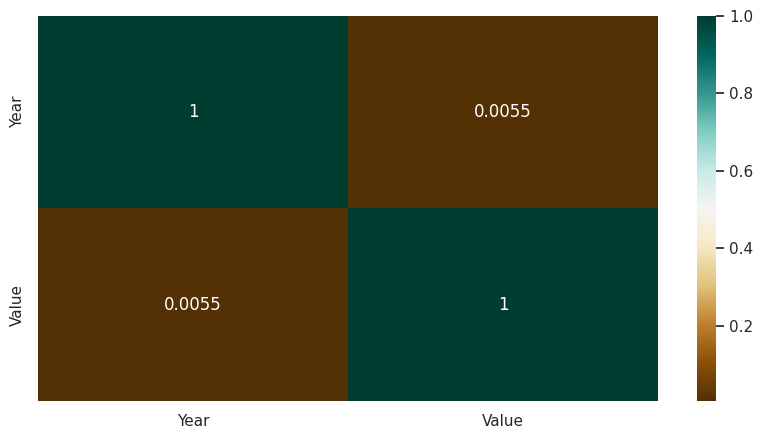

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

<ipython-input-13-b8cf530d9499>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= Augmented_df.corr()


Measured_Unit                                   Year  Income per average wage  \
Measured_Unit                                                                   
Year                                        1.000000                 0.017191   
Income per average wage                     0.017191                 1.000000   
Income / per capita GDP                    -0.023935                 0.966123   
Income PPP for private consumption, in US$  0.145045                 0.858321   
Income, US$ exchange rate                   0.025036                 0.733664   
Income at 2015 GDP price level, in US$     -0.060666                 0.731444   

Measured_Unit                               Income / per capita GDP  \
Measured_Unit                                                         
Year                                                      -0.023935   
Income per average wage                                    0.966123   
Income / per capita GDP                                    1.000000   
Income PPP for private consumption, in US$                 0.832165   
Income, US$ exchange rate                                  0.709401   
Income at 2015 GDP price level, in US$                     0.711801   

Measured_Unit                               Income PPP for private consumption, in US$  \
Measured_Unit                                                                            
Year                                                                          0.145045   
Income per average wage                                                       0.858321   
Income / per capita GDP                                                       0.832165   
Income PPP for private consumption, in US$                                    1.000000   
Income, US$ exchange rate                                                     0.941610   
Income at 2015 GDP price level, in US$                                        0.921487   

Measured_Unit                               Income, US$ exchange rate  \
Measured_Unit                                                           
Year                                                         0.025036   
Income per average wage                                      0.733664   
Income / per capita GDP                                      0.709401   
Income PPP for private consumption, in US$                   0.941610   
Income, US$ exchange rate                                    1.000000   
Income at 2015 GDP price level, in US$                       0.993364   

Measured_Unit                               Income at 2015 GDP price level, in US$  
Measured_Unit                                                                       
Year                                                                     -0.060666  
Income per average wage                                                   0.731444  
Income / per capita GDP                                                   0.711801  
Income PPP for private consumption, in US$                                0.921487  
Income, US$ exchange rate                                                 0.993364  
Income at 2015 GDP price level, in US$                                    1.000000

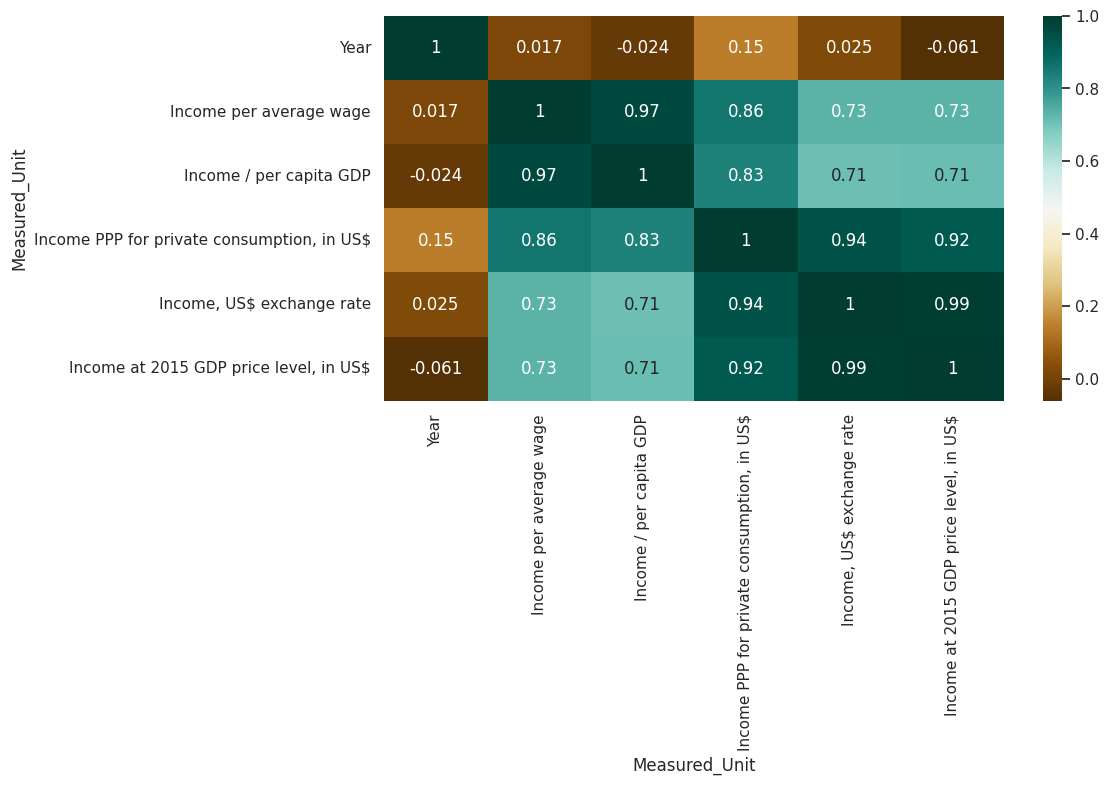

In [ ]:
plt.figure(figsize=(10,5))
c= Augmented_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c